<a href="https://colab.research.google.com/github/OberyJuccy/AI-NOTE/blob/master/data_preprocessing_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

***Python concepts:***

**A class** is the model, or a blueprint, of something we want to build. For example, if we make a house construction plan that gathers the instructions on how to build a house, then this construction plan is the class.


**An object** is an instance of the class. So if we take that same example of the house construction plan, then an object is simply a house. A house (the object) that was built by following the instructions of the construction plan (the class).
And therefore there can be many objects of the same class, because we can build many houses from the construction plan.

**A method** is a tool we can use on the object to complete a specific action. So in this same example, a tool can be to open the main door of the house if a guest is coming. A method can also be seen as a function that is applied onto the object, takes some inputs (that were defined in the class) and returns some output.

## Importing the libraries

In [ ]:
## a library is a symbol of modules containing functions and classes with which you can perform some actions and operations.
## NumPy will allow us to work with arrays
## Matplotlib allow us to plot some very nice charts
## Pandas allow us to not only import the dataset, but also create the matrix of features and the dependent variable vector. (a super useful library to pre-process your dataset and mostly to import them.)
## the most well-known library in data science is scikit-learn - all the machinery models that you can build by simply creating an object of some classes.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



## Importing the dataset

In [ ]:
dt = pd.read_csv('Data.csv')

In [ ]:
## create two new entities.(the matrix of features, the dependent variable vector)
## the features(also called the independent variables) are the columns with which you are going to predict the dependent variable.
## the independent variables are the variables containing some information with which you can predict what you want to predict(which is called the dependent variable.)

# the features - all the rows and all the columns except the last one.
X = dt.iloc[:, :-1].values
# ilock here stands for locate indexes, it will take the indexes of the columns we want to extract from the data set. Not only the indexes of the columns but also the indexes of the rows.

# dependent variable vector
y = dt.iloc[:, -1].values


In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [ ]:
## Identify missing data (assumes that missing data is represented as NaN)
## Missing data in the DataFrame can be identified using pandas methods like isnull and sum. Consider using df.isnull().sum() to get the number of missing values in each column.
missing_data = dt.isnull().sum()

In [ ]:
## Print the number of missing entries in each column
print("Missing data: \n", missing_data)

Missing data: 
 Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


In [ ]:
## generally you don't want to have any missing data in your data set, for the simple reason that it can cause some errors when training your machine learning model, and therefore you must handle them.
## Four way to handle the missing data:
##    1.to just ignore the observation by deleting it.(if you have a large data set)
##    2.to replace the missing data by the average of all the values in the column in which the data is missing.
##    3..
##    4..


In [ ]:
## replace the missing data by the average of the salary column (also can replace by the median salary, by the most frequent value)
## recommend on a general rule to select all the numerical columns because in your career you will actually work with huge data sets and you won't be able to see where the missing values are. So just include all the numerical columns to make sure to replace any missing data. Remember to exclude these ones, the string columns.
from sklearn.impute import SimpleImputer

# create an instance/object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')   # np.nan means the empty value

# apply this imputer object on the matrix of features. A class contains an assemble of instructions but also some operations and actions which you can apply to other objects or variables. And these are called methods.
## The fit method will exactly connect this imputer to the matrix of features. For example it will look at the missing values in the salary column and also it will compute the average of the salaries.
## To do the replacement we'll have to call another method called transform and which will this time apply the transformation. It will replace the missing salary here by the average of the salaries.
imputer.fit(X[:, 1:3])   # 3 not 2 because the upper bound of a range in Python is excluded. So if we exclude 2, we need go up to 3.
X[:, 1:3] = imputer.transform(X[:, 1:3]) # use transform to replace the missing data and update the X


In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

In [ ]:
'''
Another example of a categorical

# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
df = pd.read_csv('titanic.csv')

# Identify the categorical data
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Implement an instance of the ColumnTransformer class
ct = ColumnTransformer( transformers=[ ('encoder', OneHotEncoder(), categorical_features) ], remainder='passthrough' )

# Apply the fit_transform method on the instance of ColumnTransformer
X = ct.fit_transform(df)

# Convert the output into a NumPy array
X = np.array(X)

# Use LabelEncoder to encode binary categorical data
le = LabelEncoder()
y = le.fit_transform(df['Survived'])
# Print the updated matrix of features and the dependent variable vector
print("Updated matrix of features: \n", X)
print("Updated dependent variable vector: \n", y)

'''

In [ ]:
'''
Data sets - titanic.csv:

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.475,C83,S
67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F33,S
76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0,C110,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0,E101,S
125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S
140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2,B86,C
149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0,F2,S
152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6,C2,S
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5,B19,S
175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0,F4,S
194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0,F2,S
195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0,A31,C
216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.275,D36,C
219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0,C93,S
231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.475,C83,S
246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.55,C87,S
258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7,C118,C
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.875,D,C
298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)",female,17.0,1,0,PC 17758,108.9,C65,C
310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)",female,40.0,1,1,16966,134.5,E34,C
326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0,D,S
330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5,C124,S
333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6,C2,S
338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5,E40,C
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S
341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0,F2,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0,F33,S
357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0,E33,S
367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.25,D37,C
370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C
371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C82,C
391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.275,D36,C
395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)",female,24.0,0,2,PP 9549,16.7,G6,S
413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.05,E10,S
431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.55,C52,S
435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9,E44,S
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S
446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5,C104,S
453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.75,C111,C
454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.55,E38,S
461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.55,E12,S
463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5,E63,S
474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0,C93,S
488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7,B37,C
493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S
497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S
505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S
506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9,C65,C
513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5,F33,S
521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5,B73,S
524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,B38,S
540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5,B39,C
541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0,B22,S
545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.425,C86,C
551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherland) (""Mrs Morgan"")",female,48.0,1,0,11755,39.6,A16,C
559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S
578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9,E44,S
582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth Morris)",female,39.0,1,1,17421,110.8833,C68,C
584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.125,A10,C
586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S
588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2,B41,C
592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0,F4,S
622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S
633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5,B50,C
642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3,B35,C
646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5,A26,C
660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.275,D48,C
663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S
672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0,B71,S
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0,B20,S
699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.65,F G63,S
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C
702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0,C126,S
716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C
718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5,E101,S
725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1,E8,S
731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.85,C46,S
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S
749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1,D30,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.475,E121,S
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",female,33.0,0,0,110152,86.5,B77,S
764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S
780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)",female,43.0,0,1,24160,211.3375,B3,S
782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0,B20,S
783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0,D6,S
790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2,B82 B84,C
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S
807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1,E8,S
821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",female,52.0,1,1,12749,93.5,B69,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.475,E121,S
836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4,D28,S
858,1,1,"Daly, Mr. Peter Denis ",male,51.0,0,0,113055,26.55,E17,S
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Barron)",female,48.0,0,0,17466,25.9292,D17,S
868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C

'''

### Encoding the Independent Variable

In [ ]:
## one hot encoding is a very useful and popular method to use when pre-processing your data sets containing categorical variables.
## one hot encoding consists of creating binary vectors for each of the countries.
## we don't use 1/2/3 to represent the different country because There is not a relationship order between these three countries. So we want to avoid the model to have such an interpretation because that could cause some misinterpreted correlations between the features and the outcome which we want to predict.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# create an object of the column transformer class
## the first argument is transformers - where we will specify what kind of transformation we want to do and on which indexes of the columns we want to transform.
####  Input for transformers(in a pair of square brackets and then some parenthesis): First, the kind of transformation which is encoding. Second, what kind of encoding we want to do which is, one hot encoding. And third, the indexes of the columns we want to encode.
## the second argument is remainder - which will specify that we actually want to keep the columns that won't be applied some transformations meaning age and salary.
####  passthrough - a code name, that will say that we indeed want to keep the columns that won't be applied some transformation that won't be one hot encoded Which are of course age and salary.
####  If we don't include this remainder equals passthrough here, Then when we apply the transformation on X, we will only keep the first three columns resulting from one hot encoding.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

## fit transformer(form ColumnTransformer class) - which will do exactly the process of fitting and transforming at once at the same time,
X = np.array(ct.fit_transform(X))  ## force the output to be a NumPy array for future training models - because this will be expected by the future machinery models which we're gonna build. In order to train the future machinery models, where we're gonna use a train function, which is actually called fit. And this train function will expect the matrix of features X as a NumPy array.

In [ ]:
print(X)
## one had encoded variables also call that dummy variables.

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [ ]:
## replace them by zeros and ones.
## It will actually not compromise the future accuracy of the model if you just replace no and yes by zero and one.

In [ ]:
## "Label Encoder" - which will exactly encode these no's and yes's into zeros and ones respectively.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   # Because it is only one single vector. we don't have to input anything in the parenthesis
y = le.fit_transform(y)   # will exactly convert the no's and yes's the text inside numerical values.
## because this is the dependent VO vector. It doesn't need to be a non-binary as what is expected by the future missionary models.

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


Do we have to apply feature scaling before splitting the data set into the training set and test set, or after? ( I'm about to reveal the right answer. )

The answer is we have to apply feature scaling after splitting the data set into the training set and the test set.

----------
What?

**Splitting** the data set into the training set and a test set consists of making two separate sets. One training set where you're gonna train
your machinery model on existing observations, and one test set where you're going to evaluate the performance of your model on new observations. And it's important to understand that these new observations are exactly like, you know some future data that you're gonna get and on which you're going to deploy your machine learning model.

**Feature scaling** simply consists of scaling all your variables, all your features, actually, to make sure they all take values in the same scale. And we do this so as to prevent one feature to dominate the other; which therefore would be neglected by the machine learning model.

----------
Why?   -   to prevent information leakage
It's really obvious. It is for this simple reason that the test set is supposed to be a brand new set on which you're going to evaluate your machine learning model. So it's exactly like, you know, your training your machine learning model on your training set, and then later on, you know, after it is trained you're going to deploy it on new observations. So what this means is that the test set is something you're not supposed to work with for the training. And feature scaling is, as you will see, a technique that will get the mean and the standard deviation of your feature, you know, in order to perform the scaling. So, if we apply feature scaling before the split then it will actually get the mean and the standard deviation of all the values, including the ones in the test set. And since the test set is something you're not supposed to have, you know,
like some future data in production, well you know, pplying feature scaling on the original data set, before the split, ould cause some what we call information leakage on the test set. You know, we would grab some information from the test set, which we're not supposed to get, because it is supposed to be new data with new observations. ***So remember this, the essential reason why you should not apply feature scaling before the split is to prevent information leakage on the test set***; which you're not supposed to have until the training is done.

## Splitting the dataset into the Training set and Test set

**model selection** - which contains, itself, a function called train_test_split.
And this function will exactly do what we want, which is to create four separate sets, actually not two, but four, because we will actually create actually not two, but four, because we will actually create a pair of matrix of features dependent variable for the training set, and another pair of matrix of features dependent variable for the test set.

So we're basically going to get four sets,

1.X train, which is the matrix X of
features of the training set

2.X test, which is the matrix of features of the test set

3.Y train, which is the dependent variable of the training set

4.Y test which is the dependent variable of the test set

---------------------------------------
WHY?

the future machinery model that we will build in the next part, which will be all of them expecting this format as input.

for the training, it'll expect X train and Y train as input in a method actually called the fit method. And for the predictions, also called inference, these models will predict X test.

---------------------------------------
the predictions, also called inference, 对于预测，也称为推理


In [ ]:
from sklearn.model_selection import train_test_split

# create 4 variables returned by this train test split function.
## recommend to have 80% observation in the training set, and 20% in the test set.
## the observations will be randomly split  into the training set and the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)   # use "random_state=1" to make sure we have the same random factors


In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [ ]:
'''
Another example for Dataset Splitting and Feature Scaling

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the Iris dataset
dt = pd.read_csv('iris.csv')
# Separate features and target
X = dt.drop('target', axis=1)
y = dt['target']
# Split the dataset into an 80-20 training-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Apply feature scaling on the training and test sets
### The StandardScaler is applied to standardize the features to have a mean=0 and variance=1. The scaler is fitted on the training set and then used to transform both the training and test sets. This is to prevent information leak from the test set into the training set.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Print the scaled training and test sets
print("Scaled Training Set:")
print(X_train)
print("\nScaled Test Set:")
print(X_test)
'''

In [ ]:
'''
Data sets:

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0
4.6,3.4,1.4,0.3,0
5.0,3.4,1.5,0.2,0
4.4,2.9,1.4,0.2,0
4.9,3.1,1.5,0.1,0
5.4,3.7,1.5,0.2,0
4.8,3.4,1.6,0.2,0
4.8,3.0,1.4,0.1,0
4.3,3.0,1.1,0.1,0
5.8,4.0,1.2,0.2,0
5.7,4.4,1.5,0.4,0
5.4,3.9,1.3,0.4,0
5.1,3.5,1.4,0.3,0
5.7,3.8,1.7,0.3,0
5.1,3.8,1.5,0.3,0
5.4,3.4,1.7,0.2,0
5.1,3.7,1.5,0.4,0
4.6,3.6,1.0,0.2,0
5.1,3.3,1.7,0.5,0
4.8,3.4,1.9,0.2,0
5.0,3.0,1.6,0.2,0
5.0,3.4,1.6,0.4,0
5.2,3.5,1.5,0.2,0
5.2,3.4,1.4,0.2,0
4.7,3.2,1.6,0.2,0
4.8,3.1,1.6,0.2,0
5.4,3.4,1.5,0.4,0
5.2,4.1,1.5,0.1,0
5.5,4.2,1.4,0.2,0
4.9,3.1,1.5,0.2,0
5.0,3.2,1.2,0.2,0
5.5,3.5,1.3,0.2,0
4.9,3.6,1.4,0.1,0
4.4,3.0,1.3,0.2,0
5.1,3.4,1.5,0.2,0
5.0,3.5,1.3,0.3,0
4.5,2.3,1.3,0.3,0
4.4,3.2,1.3,0.2,0
5.0,3.5,1.6,0.6,0
5.1,3.8,1.9,0.4,0
4.8,3.0,1.4,0.3,0
5.1,3.8,1.6,0.2,0
4.6,3.2,1.4,0.2,0
5.3,3.7,1.5,0.2,0
5.0,3.3,1.4,0.2,0
7.0,3.2,4.7,1.4,1
6.4,3.2,4.5,1.5,1
6.9,3.1,4.9,1.5,1
5.5,2.3,4.0,1.3,1
6.5,2.8,4.6,1.5,1
5.7,2.8,4.5,1.3,1
6.3,3.3,4.7,1.6,1
4.9,2.4,3.3,1.0,1
6.6,2.9,4.6,1.3,1
5.2,2.7,3.9,1.4,1
5.0,2.0,3.5,1.0,1
5.9,3.0,4.2,1.5,1
6.0,2.2,4.0,1.0,1
6.1,2.9,4.7,1.4,1
5.6,2.9,3.6,1.3,1
6.7,3.1,4.4,1.4,1
5.6,3.0,4.5,1.5,1
5.8,2.7,4.1,1.0,1
6.2,2.2,4.5,1.5,1
5.6,2.5,3.9,1.1,1
5.9,3.2,4.8,1.8,1
6.1,2.8,4.0,1.3,1
6.3,2.5,4.9,1.5,1
6.1,2.8,4.7,1.2,1
6.4,2.9,4.3,1.3,1
6.6,3.0,4.4,1.4,1
6.8,2.8,4.8,1.4,1
6.7,3.0,5.0,1.7,1
6.0,2.9,4.5,1.5,1
5.7,2.6,3.5,1.0,1
5.5,2.4,3.8,1.1,1
5.5,2.4,3.7,1.0,1
5.8,2.7,3.9,1.2,1
6.0,2.7,5.1,1.6,1
5.4,3.0,4.5,1.5,1
6.0,3.4,4.5,1.6,1
6.7,3.1,4.7,1.5,1
6.3,2.3,4.4,1.3,1
5.6,3.0,4.1,1.3,1
5.5,2.5,4.0,1.3,1
5.5,2.6,4.4,1.2,1
6.1,3.0,4.6,1.4,1
5.8,2.6,4.0,1.2,1
5.0,2.3,3.3,1.0,1
5.6,2.7,4.2,1.3,1
5.7,3.0,4.2,1.2,1
5.7,2.9,4.2,1.3,1
6.2,2.9,4.3,1.3,1
5.1,2.5,3.0,1.1,1
5.7,2.8,4.1,1.3,1
6.3,3.3,6.0,2.5,2
5.8,2.7,5.1,1.9,2
7.1,3.0,5.9,2.1,2
6.3,2.9,5.6,1.8,2
6.5,3.0,5.8,2.2,2
7.6,3.0,6.6,2.1,2
4.9,2.5,4.5,1.7,2
7.3,2.9,6.3,1.8,2
6.7,2.5,5.8,1.8,2
7.2,3.6,6.1,2.5,2
6.5,3.2,5.1,2.0,2
6.4,2.7,5.3,1.9,2
6.8,3.0,5.5,2.1,2
5.7,2.5,5.0,2.0,2
5.8,2.8,5.1,2.4,2
6.4,3.2,5.3,2.3,2
6.5,3.0,5.5,1.8,2
7.7,3.8,6.7,2.2,2
7.7,2.6,6.9,2.3,2
6.0,2.2,5.0,1.5,2
6.9,3.2,5.7,2.3,2
5.6,2.8,4.9,2.0,2
7.7,2.8,6.7,2.0,2
6.3,2.7,4.9,1.8,2
6.7,3.3,5.7,2.1,2
7.2,3.2,6.0,1.8,2
6.2,2.8,4.8,1.8,2
6.1,3.0,4.9,1.8,2
6.4,2.8,5.6,2.1,2
7.2,3.0,5.8,1.6,2
7.4,2.8,6.1,1.9,2
7.9,3.8,6.4,2.0,2
6.4,2.8,5.6,2.2,2
6.3,2.8,5.1,1.5,2
6.1,2.6,5.6,1.4,2
7.7,3.0,6.1,2.3,2
6.3,3.4,5.6,2.4,2
6.4,3.1,5.5,1.8,2
6.0,3.0,4.8,1.8,2
6.9,3.1,5.4,2.1,2
6.7,3.1,5.6,2.4,2
6.9,3.1,5.1,2.3,2
5.8,2.7,5.1,1.9,2
6.8,3.2,5.9,2.3,2
6.7,3.3,5.7,2.5,2
6.7,3.0,5.2,2.3,2
6.3,2.5,5.0,1.9,2
6.5,3.0,5.2,2.0,2
6.2,3.4,5.4,2.3,2
5.9,3.0,5.1,1.8,2
'''

## Feature Scaling

 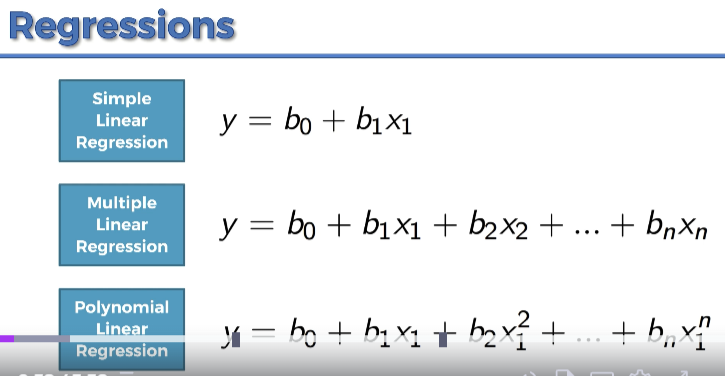

 Well, that's because for some of the machinery models that's in order to avoid some features to be dominated by other features in such a way that the dominated features are not even considered by the machinery model. Now, you also need to be aware that we won't have to apply feature scaling for all the machinery models, just for some of them.

The main two feature scaling techniques  that indeed put all your features in the same scale:
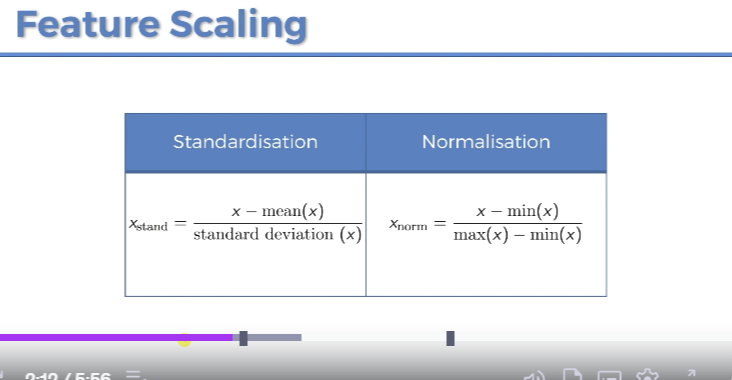

And these two techniques are first, standardization which consists of subtracting each value of your feature by the mean of all the values of the feature and then dividing by the standard deviation which is the square root of the variants. And this will put all the values of the feature between around -3 and +3.

All the different features, when you apply this transformation on all the features of your dataset, well, all your features will take value between around -: 3 and +3, so that's standardization.

---------------------------

And then you have normalization, which consists of subtracting each value of your feature by the minimum value of the feature, and then dividing by the difference between the maximum value of the feature and the minimum value of the feature. And so since denominator is positive, numerator positive and numerator always larger than denominator. Well, that means that all the values of your features will become between zero and one.

Should we go for standardization or normalization?

Well, we're gonna be here very pragmatic.

***Normalization*** is recommended when you have a normal distribution in most of your features. This will be a great feature scaling technique in that case.

***Standardization*** actually works well all the time.
It will do the job all the time.


Therefore, since ***Standardization*** is a technique that will work all the time and ***Normalization*** is a technique that is more recommended for some specific situations where you have most of your features following a normal distribution.

> *Then my ultimate recommendation for sure is to go for standardization.*


Because indeed this will always work, you will always do some relevant feature scaling and this will always improve the training process.

Do we have to apply feature scaling standardization to the dummy variables in the matrix of features?

***The answer is no.*** ***Only apply feature scaling to your numerical values.*** The answer is no, because simply, well remember the goal of standardization or feature scaling in general,it is to have all the values of the features in the same range. And since I told you that standardization actually transforms your features so that they take values between more or less minus three and plus three, while since here our dummy variables already take values between minus three and plus three because they're equal to either one or zero.Well, there is nothing extra to be done here with standardization.

And actually, standardization will only make it worse because indeed it will still transform these values between minus three and plus three. But then you will totally lose the interpretation of these variables. In other words, you will lose the information of which country corresponds to the observation.

If we apply standardization on the dummy variables we will get nonsense numerical values and we will be absolutely uncapable to say, which tuple of three values here correspond to which country. So we will totally lose the interpretation.(apply feature scaling but let's leave these dummy variables aloneso that we can keep the interpretability of the model)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

## the Fit method will only compute the mean and the standard deviation of all the values. Transform will apply this formula to indeed transform your values so that they can all be in the same scale.
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])   # only one colon - which means we are taking the range from the lower bound to the upper bound, meaning everything;    3: - take all the remaining columns from the the forth column(index=3)

## since this data is like new data, which we get, you know, later on in production, well, for this data I will only apply the transform method because indeed the features of the test set need to be scaled by the same scaler that was used on the training set.
## We cannot get a new scaler. You know, if we applied the fit transform method here on x_test, we would get a new scaler. And that would absolutely not make sense, because x_test will actually be the input of the predict function that will return the predictions, you know, after the machine learning model is trained. And since this machine learning model will be trained with a particular scaler, you know, the scaler applied on the training set,
## well, in order to make predictions that will be congruent with the way the model was trained, well, we need to apply the same scaler that was used on the training set onto the test set, so that we can get indeed the same transformation, and therefore in the end, some relevant predictions with the predict method applied to x_test.
X_test[:, 3:] = sc.transform(X_test[:, 3:])



In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
## regression models - which will predict some continuous numerical values,

In [ ]:
'''
Another example for Feature scaling for Machine Learning


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the Wine Quality Red dataset
dt = pd.read_csv('winequality-red.csv', delimiter=';')

# Separate features and target
X = dt.drop('quality', axis=1)
y = dt['quality']

# Split the dataset into an 80-20 training-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the StandardScaler on the features from the training set and transform it
X_train = scaler.fit_transform(X_train)


# Apply the transform to the test set
X_test = scaler.transform(X_test)

# Print the scaled training and test datasets
print("Scaled training set:\n", X_train)
print("Scaled test set:\n", X_test)
'''

In [ ]:
'''
Data sets

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5
7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5
8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5
8.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;5
8.5;0.28;0.56;1.8;0.092;35;103;0.9969;3.3;0.75;10.5;7
8.1;0.56;0.28;1.7;0.368;16;56;0.9968;3.11;1.28;9.3;5
7.4;0.59;0.08;4.4;0.086;6;29;0.9974;3.38;0.5;9;4
7.9;0.32;0.51;1.8;0.341;17;56;0.9969;3.04;1.08;9.2;6
8.9;0.22;0.48;1.8;0.077;29;60;0.9968;3.39;0.53;9.4;6
7.6;0.39;0.31;2.3;0.082;23;71;0.9982;3.52;0.65;9.7;5
7.9;0.43;0.21;1.6;0.106;10;37;0.9966;3.17;0.91;9.5;5
8.5;0.49;0.11;2.3;0.084;9;67;0.9968;3.17;0.53;9.4;5
6.9;0.4;0.14;2.4;0.085;21;40;0.9968;3.43;0.63;9.7;6
6.3;0.39;0.16;1.4;0.08;11;23;0.9955;3.34;0.56;9.3;5
7.6;0.41;0.24;1.8;0.08;4;11;0.9962;3.28;0.59;9.5;5
7.9;0.43;0.21;1.6;0.106;10;37;0.9966;3.17;0.91;9.5;5
7.1;0.71;0;1.9;0.08;14;35;0.9972;3.47;0.55;9.4;5
7.8;0.645;0;2;0.082;8;16;0.9964;3.38;0.59;9.8;6
6.7;0.675;0.07;2.4;0.089;17;82;0.9958;3.35;0.54;10.1;5
6.9;0.685;0;2.5;0.105;22;37;0.9966;3.46;0.57;10.6;6
8.3;0.655;0.12;2.3;0.083;15;113;0.9966;3.17;0.66;9.8;5
6.9;0.605;0.12;10.7;0.073;40;83;0.9993;3.45;0.52;9.4;6
5.2;0.32;0.25;1.8;0.103;13;50;0.9957;3.38;0.55;9.2;5
7.8;0.645;0;5.5;0.086;5;18;0.9986;3.4;0.55;9.6;6
7.8;0.6;0.14;2.4;0.086;3;15;0.9975;3.42;0.6;10.8;6
8.1;0.38;0.28;2.1;0.066;13;30;0.9968;3.23;0.73;9.7;7
5.7;1.13;0.09;1.5;0.172;7;19;0.994;3.5;0.48;9.8;4
7.3;0.45;0.36;5.9;0.074;12;87;0.9978;3.33;0.83;10.5;5
7.3;0.45;0.36;5.9;0.074;12;87;0.9978;3.33;0.83;10.5;5
8.8;0.61;0.3;2.8;0.088;17;46;0.9976;3.26;0.51;9.3;4
7.5;0.49;0.2;2.6;0.332;8;14;0.9968;3.21;0.9;10.5;6
8.1;0.66;0.22;2.2;0.069;9;23;0.9968;3.3;1.2;10.3;5
6.8;0.67;0.02;1.8;0.05;5;11;0.9962;3.48;0.52;9.5;5
4.6;0.52;0.15;2.1;0.054;8;65;0.9934;3.9;0.56;13.1;4
7.7;0.935;0.43;2.2;0.114;22;114;0.997;3.25;0.73;9.2;5
8.7;0.29;0.52;1.6;0.113;12;37;0.9969;3.25;0.58;9.5;5
6.4;0.4;0.23;1.6;0.066;5;12;0.9958;3.34;0.56;9.2;5
5.6;0.31;0.37;1.4;0.074;12;96;0.9954;3.32;0.58;9.2;5
8.8;0.66;0.26;1.7;0.074;4;23;0.9971;3.15;0.74;9.2;5
6.6;0.52;0.04;2.2;0.069;8;15;0.9956;3.4;0.63;9.4;6
6.6;0.5;0.04;2.1;0.068;6;14;0.9955;3.39;0.64;9.4;6
8.6;0.38;0.36;3;0.081;30;119;0.997;3.2;0.56;9.4;5
7.6;0.51;0.15;2.8;0.11;33;73;0.9955;3.17;0.63;10.2;6
7.7;0.62;0.04;3.8;0.084;25;45;0.9978;3.34;0.53;9.5;5
10.2;0.42;0.57;3.4;0.07;4;10;0.9971;3.04;0.63;9.6;5
7.5;0.63;0.12;5.1;0.111;50;110;0.9983;3.26;0.77;9.4;5
7.8;0.59;0.18;2.3;0.076;17;54;0.9975;3.43;0.59;10;5
7.3;0.39;0.31;2.4;0.074;9;46;0.9962;3.41;0.54;9.4;6
8.8;0.4;0.4;2.2;0.079;19;52;0.998;3.44;0.64;9.2;5
7.7;0.69;0.49;1.8;0.115;20;112;0.9968;3.21;0.71;9.3;5
7.5;0.52;0.16;1.9;0.085;12;35;0.9968;3.38;0.62;9.5;7
7;0.735;0.05;2;0.081;13;54;0.9966;3.39;0.57;9.8;5
7.2;0.725;0.05;4.65;0.086;4;11;0.9962;3.41;0.39;10.9;5
7.2;0.725;0.05;4.65;0.086;4;11;0.9962;3.41;0.39;10.9;5
7.5;0.52;0.11;1.5;0.079;11;39;0.9968;3.42;0.58;9.6;5
6.6;0.705;0.07;1.6;0.076;6;15;0.9962;3.44;0.58;10.7;5
9.3;0.32;0.57;2;0.074;27;65;0.9969;3.28;0.79;10.7;5
8;0.705;0.05;1.9;0.074;8;19;0.9962;3.34;0.95;10.5;6
7.7;0.63;0.08;1.9;0.076;15;27;0.9967;3.32;0.54;9.5;6
7.7;0.67;0.23;2.1;0.088;17;96;0.9962;3.32;0.48;9.5;5
7.7;0.69;0.22;1.9;0.084;18;94;0.9961;3.31;0.48;9.5;5
8.3;0.675;0.26;2.1;0.084;11;43;0.9976;3.31;0.53;9.2;4
9.7;0.32;0.54;2.5;0.094;28;83;0.9984;3.28;0.82;9.6;5
8.8;0.41;0.64;2.2;0.093;9;42;0.9986;3.54;0.66;10.5;5
8.8;0.41;0.64;2.2;0.093;9;42;0.9986;3.54;0.66;10.5;5
6.8;0.785;0;2.4;0.104;14;30;0.9966;3.52;0.55;10.7;6
6.7;0.75;0.12;2;0.086;12;80;0.9958;3.38;0.52;10.1;5
8.3;0.625;0.2;1.5;0.08;27;119;0.9972;3.16;1.12;9.1;4
6.2;0.45;0.2;1.6;0.069;3;15;0.9958;3.41;0.56;9.2;5
7.8;0.43;0.7;1.9;0.464;22;67;0.9974;3.13;1.28;9.4;5
7.4;0.5;0.47;2;0.086;21;73;0.997;3.36;0.57;9.1;5
7.3;0.67;0.26;1.8;0.401;16;51;0.9969;3.16;1.14;9.4;5
6.3;0.3;0.48;1.8;0.069;18;61;0.9959;3.44;0.78;10.3;6
6.9;0.55;0.15;2.2;0.076;19;40;0.9961;3.41;0.59;10.1;5
8.6;0.49;0.28;1.9;0.11;20;136;0.9972;2.93;1.95;9.9;6
7.7;0.49;0.26;1.9;0.062;9;31;0.9966;3.39;0.64;9.6;5
9.3;0.39;0.44;2.1;0.107;34;125;0.9978;3.14;1.22;9.5;5
7;0.62;0.08;1.8;0.076;8;24;0.9978;3.48;0.53;9;5
7.9;0.52;0.26;1.9;0.079;42;140;0.9964;3.23;0.54;9.5;5
8.6;0.49;0.28;1.9;0.11;20;136;0.9972;2.93;1.95;9.9;6
8.6;0.49;0.29;2;0.11;19;133;0.9972;2.93;1.98;9.8;5
7.7;0.49;0.26;1.9;0.062;9;31;0.9966;3.39;0.64;9.6;5
5;1.02;0.04;1.4;0.045;41;85;0.9938;3.75;0.48;10.5;4
4.7;0.6;0.17;2.3;0.058;17;106;0.9932;3.85;0.6;12.9;6
6.8;0.775;0;3;0.102;8;23;0.9965;3.45;0.56;10.7;5
7;0.5;0.25;2;0.07;3;22;0.9963;3.25;0.63;9.2;5
7.6;0.9;0.06;2.5;0.079;5;10;0.9967;3.39;0.56;9.8;5
8.1;0.545;0.18;1.9;0.08;13;35;0.9972;3.3;0.59;9;6
8.3;0.61;0.3;2.1;0.084;11;50;0.9972;3.4;0.61;10.2;6
7.8;0.5;0.3;1.9;0.075;8;22;0.9959;3.31;0.56;10.4;6
8.1;0.545;0.18;1.9;0.08;13;35;0.9972;3.3;0.59;9;6
8.1;0.575;0.22;2.1;0.077;12;65;0.9967;3.29;0.51;9.2;5
7.2;0.49;0.24;2.2;0.07;5;36;0.996;3.33;0.48;9.4;5
8.1;0.575;0.22;2.1;0.077;12;65;0.9967;3.29;0.51;9.2;5
7.8;0.41;0.68;1.7;0.467;18;69;0.9973;3.08;1.31;9.3;5
6.2;0.63;0.31;1.7;0.088;15;64;0.9969;3.46;0.79;9.3;5
8;0.33;0.53;2.5;0.091;18;80;0.9976;3.37;0.8;9.6;6
8.1;0.785;0.52;2;0.122;37;153;0.9969;3.21;0.69;9.3;5
7.8;0.56;0.19;1.8;0.104;12;47;0.9964;3.19;0.93;9.5;5
8.4;0.62;0.09;2.2;0.084;11;108;0.9964;3.15;0.66;9.8;5
8.4;0.6;0.1;2.2;0.085;14;111;0.9964;3.15;0.66;9.8;5
10.1;0.31;0.44;2.3;0.08;22;46;0.9988;3.32;0.67;9.7;6
7.8;0.56;0.19;1.8;0.104;12;47;0.9964;3.19;0.93;9.5;5
9.4;0.4;0.31;2.2;0.09;13;62;0.9966;3.07;0.63;10.5;6
8.3;0.54;0.28;1.9;0.077;11;40;0.9978;3.39;0.61;10;6
7.8;0.56;0.12;2;0.082;7;28;0.997;3.37;0.5;9.4;6
8.8;0.55;0.04;2.2;0.119;14;56;0.9962;3.21;0.6;10.9;6
7;0.69;0.08;1.8;0.097;22;89;0.9959;3.34;0.54;9.2;6
7.3;1.07;0.09;1.7;0.178;10;89;0.9962;3.3;0.57;9;5
8.8;0.55;0.04;2.2;0.119;14;56;0.9962;3.21;0.6;10.9;6
7.3;0.695;0;2.5;0.075;3;13;0.998;3.49;0.52;9.2;5
8;0.71;0;2.6;0.08;11;34;0.9976;3.44;0.53;9.5;5
7.8;0.5;0.17;1.6;0.082;21;102;0.996;3.39;0.48;9.5;5
9;0.62;0.04;1.9;0.146;27;90;0.9984;3.16;0.7;9.4;5
8.2;1.33;0;1.7;0.081;3;12;0.9964;3.53;0.49;10.9;5
8.1;1.33;0;1.8;0.082;3;12;0.9964;3.54;0.48;10.9;5
8;0.59;0.16;1.8;0.065;3;16;0.9962;3.42;0.92;10.5;7
6.1;0.38;0.15;1.8;0.072;6;19;0.9955;3.42;0.57;9.4;5
8;0.745;0.56;2;0.118;30;134;0.9968;3.24;0.66;9.4;5
5.6;0.5;0.09;2.3;0.049;17;99;0.9937;3.63;0.63;13;5
5.6;0.5;0.09;2.3;0.049;17;99;0.9937;3.63;0.63;13;5
6.6;0.5;0.01;1.5;0.06;17;26;0.9952;3.4;0.58;9.8;6
7.9;1.04;0.05;2.2;0.084;13;29;0.9959;3.22;0.55;9.9;6
8.4;0.745;0.11;1.9;0.09;16;63;0.9965;3.19;0.82;9.6;5
8.3;0.715;0.15;1.8;0.089;10;52;0.9968;3.23;0.77;9.5;5
7.2;0.415;0.36;2;0.081;13;45;0.9972;3.48;0.64;9.2;5
7.8;0.56;0.19;2.1;0.081;15;105;0.9962;3.33;0.54;9.5;5
7.8;0.56;0.19;2;0.081;17;108;0.9962;3.32;0.54;9.5;5
8.4;0.745;0.11;1.9;0.09;16;63;0.9965;3.19;0.82;9.6;5
8.3;0.715;0.15;1.8;0.089;10;52;0.9968;3.23;0.77;9.5;5
5.2;0.34;0;1.8;0.05;27;63;0.9916;3.68;0.79;14;6
6.3;0.39;0.08;1.7;0.066;3;20;0.9954;3.34;0.58;9.4;5
5.2;0.34;0;1.8;0.05;27;63;0.9916;3.68;0.79;14;6
8.1;0.67;0.55;1.8;0.117;32;141;0.9968;3.17;0.62;9.4;5
5.8;0.68;0.02;1.8;0.087;21;94;0.9944;3.54;0.52;10;5
7.6;0.49;0.26;1.6;0.236;10;88;0.9968;3.11;0.8;9.3;5
6.9;0.49;0.1;2.3;0.074;12;30;0.9959;3.42;0.58;10.2;6
8.2;0.4;0.44;2.8;0.089;11;43;0.9975;3.53;0.61;10.5;6
7.3;0.33;0.47;2.1;0.077;5;11;0.9958;3.33;0.53;10.3;6
9.2;0.52;1;3.4;0.61;32;69;0.9996;2.74;2.0;9.4;4
7.5;0.6;0.03;1.8;0.095;25;99;0.995;3.35;0.54;10.1;5
7.5;0.6;0.03;1.8;0.095;25;99;0.995;3.35;0.54;10.1;5
7.1;0.43;0.42;5.5;0.07;29;129;0.9973;3.42;0.72;10.5;5
7.1;0.43;0.42;5.5;0.071;28;128;0.9973;3.42;0.71;10.5;5
7.1;0.43;0.42;5.5;0.07;29;129;0.9973;3.42;0.72;10.5;5
7.1;0.43;0.42;5.5;0.071;28;128;0.9973;3.42;0.71;10.5;5
7.1;0.68;0;2.2;0.073;12;22;0.9969;3.48;0.5;9.3;5
6.8;0.6;0.18;1.9;0.079;18;86;0.9968;3.59;0.57;9.3;6
7.6;0.95;0.03;2;0.09;7;20;0.9959;3.2;0.56;9.6;5
7.6;0.68;0.02;1.3;0.072;9;20;0.9965;3.17;1.08;9.2;4
7.8;0.53;0.04;1.7;0.076;17;31;0.9964;3.33;0.56;10;6
7.4;0.6;0.26;7.3;0.07;36;121;0.9982;3.37;0.49;9.4;5
7.3;0.59;0.26;7.2;0.07;35;121;0.9981;3.37;0.49;9.4;5
7.8;0.63;0.48;1.7;0.1;14;96;0.9961;3.19;0.62;9.5;5
6.8;0.64;0.1;2.1;0.085;18;101;0.9956;3.34;0.52;10.2;5
7.3;0.55;0.03;1.6;0.072;17;42;0.9956;3.37;0.48;9;4
6.8;0.63;0.07;2.1;0.089;11;44;0.9953;3.47;0.55;10.4;6
7.5;0.705;0.24;1.8;0.36;15;63;0.9964;3;1.59;9.5;5
7.9;0.885;0.03;1.8;0.058;4;8;0.9972;3.36;0.33;9.1;4
8;0.42;0.17;2;0.073;6;18;0.9972;3.29;0.61;9.2;6
8;0.42;0.17;2;0.073;6;18;0.9972;3.29;0.61;9.2;6
7.4;0.62;0.05;1.9;0.068;24;42;0.9961;3.42;0.57;11.5;6
7.3;0.38;0.21;2;0.08;7;35;0.9961;3.33;0.47;9.5;5
6.9;0.5;0.04;1.5;0.085;19;49;0.9958;3.35;0.78;9.5;5
7.3;0.38;0.21;2;0.08;7;35;0.9961;3.33;0.47;9.5;5
7.5;0.52;0.42;2.3;0.087;8;38;0.9972;3.58;0.61;10.5;6
7;0.805;0;2.5;0.068;7;20;0.9969;3.48;0.56;9.6;5
8.8;0.61;0.14;2.4;0.067;10;42;0.9969;3.19;0.59;9.5;5
8.8;0.61;0.14;2.4;0.067;10;42;0.9969;3.19;0.59;9.5;5
8.9;0.61;0.49;2;0.27;23;110;0.9972;3.12;1.02;9.3;5
7.2;0.73;0.02;2.5;0.076;16;42;0.9972;3.44;0.52;9.3;5
6.8;0.61;0.2;1.8;0.077;11;65;0.9971;3.54;0.58;9.3;5
6.7;0.62;0.21;1.9;0.079;8;62;0.997;3.52;0.58;9.3;6
8.9;0.31;0.57;2;0.111;26;85;0.9971;3.26;0.53;9.7;5
7.4;0.39;0.48;2;0.082;14;67;0.9972;3.34;0.55;9.2;5
7.7;0.705;0.1;2.6;0.084;9;26;0.9976;3.39;0.49;9.7;5
7.9;0.5;0.33;2;0.084;15;143;0.9968;3.2;0.55;9.5;5
7.9;0.49;0.32;1.9;0.082;17;144;0.9968;3.2;0.55;9.5;5
8.2;0.5;0.35;2.9;0.077;21;127;0.9976;3.23;0.62;9.4;5
6.4;0.37;0.25;1.9;0.074;21;49;0.9974;3.57;0.62;9.8;6
6.8;0.63;0.12;3.8;0.099;16;126;0.9969;3.28;0.61;9.5;5
7.6;0.55;0.21;2.2;0.071;7;28;0.9964;3.28;0.55;9.7;5
7.6;0.55;0.21;2.2;0.071;7;28;0.9964;3.28;0.55;9.7;5
7.8;0.59;0.33;2;0.074;24;120;0.9968;3.25;0.54;9.4;5
7.3;0.58;0.3;2.4;0.074;15;55;0.9968;3.46;0.59;10.2;5
11.5;0.3;0.6;2;0.067;12;27;0.9981;3.11;0.97;10.1;6
5.4;0.835;0.08;1.2;0.046;13;93;0.9924;3.57;0.85;13;7
6.9;1.09;0.06;2.1;0.061;12;31;0.9948;3.51;0.43;11.4;4
9.6;0.32;0.47;1.4;0.056;9;24;0.99695;3.22;0.82;10.3;7
8.8;0.37;0.48;2.1;0.097;39;145;0.9975;3.04;1.03;9.3;5
6.8;0.5;0.11;1.5;0.075;16;49;0.99545;3.36;0.79;9.5;5
7;0.42;0.35;1.6;0.088;16;39;0.9961;3.34;0.55;9.2;5
7;0.43;0.36;1.6;0.089;14;37;0.99615;3.34;0.56;9.2;6
12.8;0.3;0.74;2.6;0.095;9;28;0.9994;3.2;0.77;10.8;7
12.8;0.3;0.74;2.6;0.095;9;28;0.9994;3.2;0.77;10.8;7
7.8;0.57;0.31;1.8;0.069;26;120;0.99625;3.29;0.53;9.3;5
7.8;0.44;0.28;2.7;0.1;18;95;0.9966;3.22;0.67;9.4;5
11;0.3;0.58;2.1;0.054;7;19;0.998;3.31;0.88;10.5;7
9.7;0.53;0.6;2;0.039;5;19;0.99585;3.3;0.86;12.4;6
8;0.725;0.24;2.8;0.083;10;62;0.99685;3.35;0.56;10;6
11.6;0.44;0.64;2.1;0.059;5;15;0.998;3.21;0.67;10.2;6
8.2;0.57;0.26;2.2;0.06;28;65;0.9959;3.3;0.43;10.1;5
7.8;0.735;0.08;2.4;0.092;10;41;0.9974;3.24;0.71;9.8;6
7;0.49;0.49;5.6;0.06;26;121;0.9974;3.34;0.76;10.5;5
8.7;0.625;0.16;2;0.101;13;49;0.9962;3.14;0.57;11;5
8.1;0.725;0.22;2.2;0.072;11;41;0.9967;3.36;0.55;9.1;5
7.5;0.49;0.19;1.9;0.076;10;44;0.9957;3.39;0.54;9.7;5
7.8;0.53;0.33;2.4;0.08;24;144;0.99655;3.3;0.6;9.5;5
7.8;0.34;0.37;2;0.082;24;58;0.9964;3.34;0.59;9.4;6
7.4;0.53;0.26;2;0.101;16;72;0.9957;3.15;0.57;9.4;5
6.8;0.61;0.04;1.5;0.057;5;10;0.99525;3.42;0.6;9.5;5
8.6;0.645;0.25;2;0.083;8;28;0.99815;3.28;0.6;10;6
8.4;0.635;0.36;2;0.089;15;55;0.99745;3.31;0.57;10.4;4
7.7;0.43;0.25;2.6;0.073;29;63;0.99615;3.37;0.58;10.5;6
8.9;0.59;0.5;2;0.337;27;81;0.9964;3.04;1.61;9.5;6
9;0.82;0.14;2.6;0.089;9;23;0.9984;3.39;0.63;9.8;5
7.7;0.43;0.25;2.6;0.073;29;63;0.99615;3.37;0.58;10.5;6
6.9;0.52;0.25;2.6;0.081;10;37;0.99685;3.46;0.5;11;5
5.2;0.48;0.04;1.6;0.054;19;106;0.9927;3.54;0.62;12.2;7
8;0.38;0.06;1.8;0.078;12;49;0.99625;3.37;0.52;9.9;6
8.5;0.37;0.2;2.8;0.09;18;58;0.998;3.34;0.7;9.6;6
6.9;0.52;0.25;2.6;0.081;10;37;0.99685;3.46;0.5;11;5
8.2;1;0.09;2.3;0.065;7;37;0.99685;3.32;0.55;9;6
7.2;0.63;0;1.9;0.097;14;38;0.99675;3.37;0.58;9;6
7.2;0.63;0;1.9;0.097;14;38;0.99675;3.37;0.58;9;6
7.2;0.645;0;1.9;0.097;15;39;0.99675;3.37;0.58;9.2;6
7.2;0.63;0;1.9;0.097;14;38;0.99675;3.37;0.58;9;6
8.2;1;0.09;2.3;0.065;7;37;0.99685;3.32;0.55;9;6
8.9;0.635;0.37;1.7;0.263;5;62;0.9971;3;1.09;9.3;5
12;0.38;0.56;2.1;0.093;6;24;0.99925;3.14;0.71;10.9;6
7.7;0.58;0.1;1.8;0.102;28;109;0.99565;3.08;0.49;9.8;6
15;0.21;0.44;2.2;0.075;10;24;1.00005;3.07;0.84;9.2;7
15;0.21;0.44;2.2;0.075;10;24;1.00005;3.07;0.84;9.2;7
7.3;0.66;0;2;0.084;6;23;0.9983;3.61;0.96;9.9;6
7.1;0.68;0.07;1.9;0.075;16;51;0.99685;3.38;0.52;9.5;5
8.2;0.6;0.17;2.3;0.072;11;73;0.9963;3.2;0.45;9.3;5
7.7;0.53;0.06;1.7;0.074;9;39;0.99615;3.35;0.48;9.8;6
7.3;0.66;0;2;0.084;6;23;0.9983;3.61;0.96;9.9;6
10.8;0.32;0.44;1.6;0.063;16;37;0.9985;3.22;0.78;10;6
7.1;0.6;0;1.8;0.074;16;34;0.9972;3.47;0.7;9.9;6
11.1;0.35;0.48;3.1;0.09;5;21;0.9986;3.17;0.53;10.5;5
7.7;0.775;0.42;1.9;0.092;8;86;0.9959;3.23;0.59;9.5;5
7.1;0.6;0;1.8;0.074;16;34;0.9972;3.47;0.7;9.9;6
8;0.57;0.23;3.2;0.073;17;119;0.99675;3.26;0.57;9.3;5
9.4;0.34;0.37;2.2;0.075;5;13;0.998;3.22;0.62;9.2;5
6.6;0.695;0;2.1;0.075;12;56;0.9968;3.49;0.67;9.2;5
7.7;0.41;0.76;1.8;0.611;8;45;0.9968;3.06;1.26;9.4;5
10;0.31;0.47;2.6;0.085;14;33;0.99965;3.36;0.8;10.5;7
7.9;0.33;0.23;1.7;0.077;18;45;0.99625;3.29;0.65;9.3;5
7;0.975;0.04;2;0.087;12;67;0.99565;3.35;0.6;9.4;4
8;0.52;0.03;1.7;0.07;10;35;0.99575;3.34;0.57;10;5
7.9;0.37;0.23;1.8;0.077;23;49;0.9963;3.28;0.67;9.3;5
12.5;0.56;0.49;2.4;0.064;5;27;0.9999;3.08;0.87;10.9;5
11.8;0.26;0.52;1.8;0.071;6;10;0.9968;3.2;0.72;10.2;7
8.1;0.87;0;3.3;0.096;26;61;1.00025;3.6;0.72;9.8;4
7.9;0.35;0.46;3.6;0.078;15;37;0.9973;3.35;0.86;12.8;8
6.9;0.54;0.04;3;0.077;7;27;0.9987;3.69;0.91;9.4;6
11.5;0.18;0.51;4;0.104;4;23;0.9996;3.28;0.97;10.1;6
7.9;0.545;0.06;4;0.087;27;61;0.9965;3.36;0.67;10.7;6
11.5;0.18;0.51;4;0.104;4;23;0.9996;3.28;0.97;10.1;6
10.9;0.37;0.58;4;0.071;17;65;0.99935;3.22;0.78;10.1;5
8.4;0.715;0.2;2.4;0.076;10;38;0.99735;3.31;0.64;9.4;5
7.5;0.65;0.18;7;0.088;27;94;0.99915;3.38;0.77;9.4;5
7.9;0.545;0.06;4;0.087;27;61;0.9965;3.36;0.67;10.7;6
6.9;0.54;0.04;3;0.077;7;27;0.9987;3.69;0.91;9.4;6
11.5;0.18;0.51;4;0.104;4;23;0.9996;3.28;0.97;10.1;6
10.3;0.32;0.45;6.4;0.073;5;13;0.9976;3.23;0.82;12.6;8
8.9;0.4;0.32;5.6;0.087;10;47;0.9991;3.38;0.77;10.5;7
11.4;0.26;0.44;3.6;0.071;6;19;0.9986;3.12;0.82;9.3;6
7.7;0.27;0.68;3.5;0.358;5;10;0.9972;3.25;1.08;9.9;7
7.6;0.52;0.12;3;0.067;12;53;0.9971;3.36;0.57;9.1;5
8.9;0.4;0.32;5.6;0.087;10;47;0.9991;3.38;0.77;10.5;7
9.9;0.59;0.07;3.4;0.102;32;71;1.00015;3.31;0.71;9.8;5
9.9;0.59;0.07;3.4;0.102;32;71;1.00015;3.31;0.71;9.8;5
12;0.45;0.55;2;0.073;25;49;0.9997;3.1;0.76;10.3;6
7.5;0.4;0.12;3;0.092;29;53;0.9967;3.37;0.7;10.3;6
8.7;0.52;0.09;2.5;0.091;20;49;0.9976;3.34;0.86;10.6;7
11.6;0.42;0.53;3.3;0.105;33;98;1.001;3.2;0.95;9.2;5
8.7;0.52;0.09;2.5;0.091;20;49;0.9976;3.34;0.86;10.6;7
11;0.2;0.48;2;0.343;6;18;0.9979;3.3;0.71;10.5;5
10.4;0.55;0.23;2.7;0.091;18;48;0.9994;3.22;0.64;10.3;6
6.9;0.36;0.25;2.4;0.098;5;16;0.9964;3.41;0.6;10.1;6
13.3;0.34;0.52;3.2;0.094;17;53;1.0014;3.05;0.81;9.5;6
10.8;0.5;0.46;2.5;0.073;5;27;1.0001;3.05;0.64;9.5;5
10.6;0.83;0.37;2.6;0.086;26;70;0.9981;3.16;0.52;9.9;5
7.1;0.63;0.06;2;0.083;8;29;0.99855;3.67;0.73;9.6;5
7.2;0.65;0.02;2.3;0.094;5;31;0.9993;3.67;0.8;9.7;5
6.9;0.67;0.06;2.1;0.08;8;33;0.99845;3.68;0.71;9.6;5
7.5;0.53;0.06;2.6;0.086;20;44;0.9965;3.38;0.59;10.7;6
11.1;0.18;0.48;1.5;0.068;7;15;0.9973;3.22;0.64;10.1;6
8.3;0.705;0.12;2.6;0.092;12;28;0.9994;3.51;0.72;10;5
7.4;0.67;0.12;1.6;0.186;5;21;0.996;3.39;0.54;9.5;5
8.4;0.65;0.6;2.1;0.112;12;90;0.9973;3.2;0.52;9.2;5
10.3;0.53;0.48;2.5;0.063;6;25;0.9998;3.12;0.59;9.3;6
7.6;0.62;0.32;2.2;0.082;7;54;0.9966;3.36;0.52;9.4;5
10.3;0.41;0.42;2.4;0.213;6;14;0.9994;3.19;0.62;9.5;6
10.3;0.43;0.44;2.4;0.214;5;12;0.9994;3.19;0.63;9.5;6
7.4;0.29;0.38;1.7;0.062;9;30;0.9968;3.41;0.53;9.5;6
10.3;0.53;0.48;2.5;0.063;6;25;0.9998;3.12;0.59;9.3;6
7.9;0.53;0.24;2;0.072;15;105;0.996;3.27;0.54;9.4;6
9;0.46;0.31;2.8;0.093;19;98;0.99815;3.32;0.63;9.5;6
8.6;0.47;0.3;3;0.076;30;135;0.9976;3.3;0.53;9.4;5
7.4;0.36;0.29;2.6;0.087;26;72;0.99645;3.39;0.68;11;5
7.1;0.35;0.29;2.5;0.096;20;53;0.9962;3.42;0.65;11;6
9.6;0.56;0.23;3.4;0.102;37;92;0.9996;3.3;0.65;10.1;5
9.6;0.77;0.12;2.9;0.082;30;74;0.99865;3.3;0.64;10.4;6
9.8;0.66;0.39;3.2;0.083;21;59;0.9989;3.37;0.71;11.5;7
9.6;0.77;0.12;2.9;0.082;30;74;0.99865;3.3;0.64;10.4;6
9.8;0.66;0.39;3.2;0.083;21;59;0.9989;3.37;0.71;11.5;7
9.3;0.61;0.26;3.4;0.09;25;87;0.99975;3.24;0.62;9.7;5
7.8;0.62;0.05;2.3;0.079;6;18;0.99735;3.29;0.63;9.3;5
10.3;0.59;0.42;2.8;0.09;35;73;0.999;3.28;0.7;9.5;6
10;0.49;0.2;11;0.071;13;50;1.0015;3.16;0.69;9.2;6
10;0.49;0.2;11;0.071;13;50;1.0015;3.16;0.69;9.2;6
11.6;0.53;0.66;3.65;0.121;6;14;0.9978;3.05;0.74;11.5;7
10.3;0.44;0.5;4.5;0.107;5;13;0.998;3.28;0.83;11.5;5
13.4;0.27;0.62;2.6;0.082;6;21;1.0002;3.16;0.67;9.7;6
10.7;0.46;0.39;2;0.061;7;15;0.9981;3.18;0.62;9.5;5
10.2;0.36;0.64;2.9;0.122;10;41;0.998;3.23;0.66;12.5;6
10.2;0.36;0.64;2.9;0.122;10;41;0.998;3.23;0.66;12.5;6
8;0.58;0.28;3.2;0.066;21;114;0.9973;3.22;0.54;9.4;6
8.4;0.56;0.08;2.1;0.105;16;44;0.9958;3.13;0.52;11;5
7.9;0.65;0.01;2.5;0.078;17;38;0.9963;3.34;0.74;11.7;7
11.9;0.695;0.53;3.4;0.128;7;21;0.9992;3.17;0.84;12.2;7
8.9;0.43;0.45;1.9;0.052;6;16;0.9948;3.35;0.7;12.5;6
7.8;0.43;0.32;2.8;0.08;29;58;0.9974;3.31;0.64;10.3;5
12.4;0.49;0.58;3;0.103;28;99;1.0008;3.16;1;11.5;6
12.5;0.28;0.54;2.3;0.082;12;29;0.9997;3.11;1.36;9.8;7
12.2;0.34;0.5;2.4;0.066;10;21;1;3.12;1.18;9.2;6
10.6;0.42;0.48;2.7;0.065;5;18;0.9972;3.21;0.87;11.3;6
10.9;0.39;0.47;1.8;0.118;6;14;0.9982;3.3;0.75;9.8;6
10.9;0.39;0.47;1.8;0.118;6;14;0.9982;3.3;0.75;9.8;6
11.9;0.57;0.5;2.6;0.082;6;32;1.0006;3.12;0.78;10.7;6
7;0.685;0;1.9;0.067;40;63;0.9979;3.6;0.81;9.9;5
6.6;0.815;0.02;2.7;0.072;17;34;0.9955;3.58;0.89;12.3;7
13.8;0.49;0.67;3;0.093;6;15;0.9986;3.02;0.93;12;6
9.6;0.56;0.31;2.8;0.089;15;46;0.9979;3.11;0.92;10;6
9.1;0.785;0;2.6;0.093;11;28;0.9994;3.36;0.86;9.4;6
10.7;0.67;0.22;2.7;0.107;17;34;1.0004;3.28;0.98;9.9;6
9.1;0.795;0;2.6;0.096;11;26;0.9994;3.35;0.83;9.4;6
7.7;0.665;0;2.4;0.09;8;19;0.9974;3.27;0.73;9.3;5
13.5;0.53;0.79;4.8;0.12;23;77;1.0018;3.18;0.77;13;5
6.1;0.21;0.4;1.4;0.066;40.5;165;0.9912;3.25;0.59;11.9;6
6.7;0.75;0.01;2.4;0.078;17;32;0.9955;3.55;0.61;12.8;6
11.5;0.41;0.52;3;0.08;29;55;1.0001;3.26;0.88;11;5
10.5;0.42;0.66;2.95;0.116;12;29;0.997;3.24;0.75;11.7;7
11.9;0.43;0.66;3.1;0.109;10;23;1;3.15;0.85;10.4;7
12.6;0.38;0.66;2.6;0.088;10;41;1.001;3.17;0.68;9.8;6
8.2;0.7;0.23;2;0.099;14;81;0.9973;3.19;0.7;9.4;5
8.6;0.45;0.31;2.6;0.086;21;50;0.9982;3.37;0.91;9.9;6
11.9;0.58;0.66;2.5;0.072;6;37;0.9992;3.05;0.56;10;5
12.5;0.46;0.63;2;0.071;6;15;0.9988;2.99;0.87;10.2;5
12.8;0.615;0.66;5.8;0.083;7;42;1.0022;3.07;0.73;10;7
10;0.42;0.5;3.4;0.107;7;21;0.9979;3.26;0.93;11.8;6
12.8;0.615;0.66;5.8;0.083;7;42;1.0022;3.07;0.73;10;7
10.4;0.575;0.61;2.6;0.076;11;24;1;3.16;0.69;9;5
10.3;0.34;0.52;2.8;0.159;15;75;0.9998;3.18;0.64;9.4;5
9.4;0.27;0.53;2.4;0.074;6;18;0.9962;3.2;1.13;12;7
6.9;0.765;0.02;2.3;0.063;35;63;0.9975;3.57;0.78;9.9;5
7.9;0.24;0.4;1.6;0.056;11;25;0.9967;3.32;0.87;8.7;6
9.1;0.28;0.48;1.8;0.067;26;46;0.9967;3.32;1.04;10.6;6
7.4;0.55;0.22;2.2;0.106;12;72;0.9959;3.05;0.63;9.2;5
14;0.41;0.63;3.8;0.089;6;47;1.0014;3.01;0.81;10.8;6
11.5;0.54;0.71;4.4;0.124;6;15;0.9984;3.01;0.83;11.8;7
11.5;0.45;0.5;3;0.078;19;47;1.0003;3.26;1.11;11;6
9.4;0.27;0.53;2.4;0.074;6;18;0.9962;3.2;1.13;12;7
11.4;0.625;0.66;6.2;0.088;6;24;0.9988;3.11;0.99;13.3;6
8.3;0.42;0.38;2.5;0.094;24;60;0.9979;3.31;0.7;10.8;6
8.3;0.26;0.42;2;0.08;11;27;0.9974;3.21;0.8;9.4;6
13.7;0.415;0.68;2.9;0.085;17;43;1.0014;3.06;0.8;10;6
8.3;0.26;0.42;2;0.08;11;27;0.9974;3.21;0.8;9.4;6
8.3;0.26;0.42;2;0.08;11;27;0.9974;3.21;0.8;9.4;6
7.7;0.51;0.28;2.1;0.087;23;54;0.998;3.42;0.74;9.2;5
7.4;0.63;0.07;2.4;0.09;11;37;0.9979;3.43;0.76;9.7;6
7.8;0.54;0.26;2;0.088;23;48;0.9981;3.41;0.74;9.2;6
8.3;0.66;0.15;1.9;0.079;17;42;0.9972;3.31;0.54;9.6;6
7.8;0.46;0.26;1.9;0.088;23;53;0.9981;3.43;0.74;9.2;6
9.6;0.38;0.31;2.5;0.096;16;49;0.9982;3.19;0.7;10;7
5.6;0.85;0.05;1.4;0.045;12;88;0.9924;3.56;0.82;12.9;8
13.7;0.415;0.68;2.9;0.085;17;43;1.0014;3.06;0.8;10;6
9.5;0.37;0.52;2;0.082;6;26;0.998;3.18;0.51;9.5;5
8.4;0.665;0.61;2;0.112;13;95;0.997;3.16;0.54;9.1;5
12.7;0.6;0.65;2.3;0.063;6;25;0.9997;3.03;0.57;9.9;5
12;0.37;0.76;4.2;0.066;7;38;1.0004;3.22;0.6;13;7
6.6;0.735;0.02;7.9;0.122;68;124;0.9994;3.47;0.53;9.9;5
11.5;0.59;0.59;2.6;0.087;13;49;0.9988;3.18;0.65;11;6
11.5;0.59;0.59;2.6;0.087;13;49;0.9988;3.18;0.65;11;6
8.7;0.765;0.22;2.3;0.064;9;42;0.9963;3.1;0.55;9.4;5
6.6;0.735;0.02;7.9;0.122;68;124;0.9994;3.47;0.53;9.9;5
7.7;0.26;0.3;1.7;0.059;20;38;0.9949;3.29;0.47;10.8;6
12.2;0.48;0.54;2.6;0.085;19;64;1;3.1;0.61;10.5;6
11.4;0.6;0.49;2.7;0.085;10;41;0.9994;3.15;0.63;10.5;6
7.7;0.69;0.05;2.7;0.075;15;27;0.9974;3.26;0.61;9.1;5
8.7;0.31;0.46;1.4;0.059;11;25;0.9966;3.36;0.76;10.1;6
9.8;0.44;0.47;2.5;0.063;9;28;0.9981;3.24;0.65;10.8;6
12;0.39;0.66;3;0.093;12;30;0.9996;3.18;0.63;10.8;7
10.4;0.34;0.58;3.7;0.174;6;16;0.997;3.19;0.7;11.3;6
12.5;0.46;0.49;4.5;0.07;26;49;0.9981;3.05;0.57;9.6;4
9;0.43;0.34;2.5;0.08;26;86;0.9987;3.38;0.62;9.5;6
9.1;0.45;0.35;2.4;0.08;23;78;0.9987;3.38;0.62;9.5;5
7.1;0.735;0.16;1.9;0.1;15;77;0.9966;3.27;0.64;9.3;5
9.9;0.4;0.53;6.7;0.097;6;19;0.9986;3.27;0.82;11.7;7
8.8;0.52;0.34;2.7;0.087;24;122;0.9982;3.26;0.61;9.5;5
8.6;0.725;0.24;6.6;0.117;31;134;1.0014;3.32;1.07;9.3;5
10.6;0.48;0.64;2.2;0.111;6;20;0.997;3.26;0.66;11.7;6
7;0.58;0.12;1.9;0.091;34;124;0.9956;3.44;0.48;10.5;5
11.9;0.38;0.51;2;0.121;7;20;0.9996;3.24;0.76;10.4;6
6.8;0.77;0;1.8;0.066;34;52;0.9976;3.62;0.68;9.9;5
9.5;0.56;0.33;2.4;0.089;35;67;0.9972;3.28;0.73;11.8;7
6.6;0.84;0.03;2.3;0.059;32;48;0.9952;3.52;0.56;12.3;7
7.7;0.96;0.2;2;0.047;15;60;0.9955;3.36;0.44;10.9;5
10.5;0.24;0.47;2.1;0.066;6;24;0.9978;3.15;0.9;11;7
7.7;0.96;0.2;2;0.047;15;60;0.9955;3.36;0.44;10.9;5
6.6;0.84;0.03;2.3;0.059;32;48;0.9952;3.52;0.56;12.3;7
6.4;0.67;0.08;2.1;0.045;19;48;0.9949;3.49;0.49;11.4;6
9.5;0.78;0.22;1.9;0.077;6;32;0.9988;3.26;0.56;10.6;6
9.1;0.52;0.33;1.3;0.07;9;30;0.9978;3.24;0.6;9.3;5
12.8;0.84;0.63;2.4;0.088;13;35;0.9997;3.1;0.6;10.4;6
10.5;0.24;0.47;2.1;0.066;6;24;0.9978;3.15;0.9;11;7
7.8;0.55;0.35;2.2;0.074;21;66;0.9974;3.25;0.56;9.2;5
11.9;0.37;0.69;2.3;0.078;12;24;0.9958;3;0.65;12.8;6
12.3;0.39;0.63;2.3;0.091;6;18;1.0004;3.16;0.49;9.5;5
10.4;0.41;0.55;3.2;0.076;22;54;0.9996;3.15;0.89;9.9;6
12.3;0.39;0.63;2.3;0.091;6;18;1.0004;3.16;0.49;9.5;5
8;0.67;0.3;2;0.06;38;62;0.9958;3.26;0.56;10.2;6
11.1;0.45;0.73;3.2;0.066;6;22;0.9986;3.17;0.66;11.2;6
10.4;0.41;0.55;3.2;0.076;22;54;0.9996;3.15;0.89;9.9;6
7;0.62;0.18;1.5;0.062;7;50;0.9951;3.08;0.6;9.3;5
12.6;0.31;0.72;2.2;0.072;6;29;0.9987;2.88;0.82;9.8;8
11.9;0.4;0.65;2.15;0.068;7;27;0.9988;3.06;0.68;11.3;6
15.6;0.685;0.76;3.7;0.1;6;43;1.0032;2.95;0.68;11.2;7
10;0.44;0.49;2.7;0.077;11;19;0.9963;3.23;0.63;11.6;7
5.3;0.57;0.01;1.7;0.054;5;27;0.9934;3.57;0.84;12.5;7
9.5;0.735;0.1;2.1;0.079;6;31;0.9986;3.23;0.56;10.1;6
12.5;0.38;0.6;2.6;0.081;31;72;0.9996;3.1;0.73;10.5;5
9.3;0.48;0.29;2.1;0.127;6;16;0.9968;3.22;0.72;11.2;5
8.6;0.53;0.22;2;0.1;7;27;0.9967;3.2;0.56;10.2;6
11.9;0.39;0.69;2.8;0.095;17;35;0.9994;3.1;0.61;10.8;6
11.9;0.39;0.69;2.8;0.095;17;35;0.9994;3.1;0.61;10.8;6
8.4;0.37;0.53;1.8;0.413;9;26;0.9979;3.06;1.06;9.1;6
6.8;0.56;0.03;1.7;0.084;18;35;0.9968;3.44;0.63;10;6
10.4;0.33;0.63;2.8;0.084;5;22;0.9998;3.26;0.74;11.2;7
7;0.23;0.4;1.6;0.063;21;67;0.9952;3.5;0.63;11.1;5
11.3;0.62;0.67;5.2;0.086;6;19;0.9988;3.22;0.69;13.4;8
8.9;0.59;0.39;2.3;0.095;5;22;0.9986;3.37;0.58;10.3;5
9.2;0.63;0.21;2.7;0.097;29;65;0.9988;3.28;0.58;9.6;5
10.4;0.33;0.63;2.8;0.084;5;22;0.9998;3.26;0.74;11.2;7
11.6;0.58;0.66;2.2;0.074;10;47;1.0008;3.25;0.57;9;3
9.2;0.43;0.52;2.3;0.083;14;23;0.9976;3.35;0.61;11.3;6
8.3;0.615;0.22;2.6;0.087;6;19;0.9982;3.26;0.61;9.3;5
11;0.26;0.68;2.55;0.085;10;25;0.997;3.18;0.61;11.8;5
8.1;0.66;0.7;2.2;0.098;25;129;0.9972;3.08;0.53;9;5
11.5;0.315;0.54;2.1;0.084;5;15;0.9987;2.98;0.7;9.2;6
10;0.29;0.4;2.9;0.098;10;26;1.0006;3.48;0.91;9.7;5
10.3;0.5;0.42;2;0.069;21;51;0.9982;3.16;0.72;11.5;6
8.8;0.46;0.45;2.6;0.065;7;18;0.9947;3.32;0.79;14;6
11.4;0.36;0.69;2.1;0.09;6;21;1;3.17;0.62;9.2;6
8.7;0.82;0.02;1.2;0.07;36;48;0.9952;3.2;0.58;9.8;5
13;0.32;0.65;2.6;0.093;15;47;0.9996;3.05;0.61;10.6;5
9.6;0.54;0.42;2.4;0.081;25;52;0.997;3.2;0.71;11.4;6
12.5;0.37;0.55;2.6;0.083;25;68;0.9995;3.15;0.82;10.4;6
9.9;0.35;0.55;2.1;0.062;5;14;0.9971;3.26;0.79;10.6;5
10.5;0.28;0.51;1.7;0.08;10;24;0.9982;3.2;0.89;9.4;6
9.6;0.68;0.24;2.2;0.087;5;28;0.9988;3.14;0.6;10.2;5
9.3;0.27;0.41;2;0.091;6;16;0.998;3.28;0.7;9.7;5
10.4;0.24;0.49;1.8;0.075;6;20;0.9977;3.18;1.06;11;6
9.6;0.68;0.24;2.2;0.087;5;28;0.9988;3.14;0.6;10.2;5
9.4;0.685;0.11;2.7;0.077;6;31;0.9984;3.19;0.7;10.1;6
10.6;0.28;0.39;15.5;0.069;6;23;1.0026;3.12;0.66;9.2;5
9.4;0.3;0.56;2.8;0.08;6;17;0.9964;3.15;0.92;11.7;8
10.6;0.36;0.59;2.2;0.152;6;18;0.9986;3.04;1.05;9.4;5
10.6;0.36;0.6;2.2;0.152;7;18;0.9986;3.04;1.06;9.4;5
10.6;0.44;0.68;4.1;0.114;6;24;0.997;3.06;0.66;13.4;6
10.2;0.67;0.39;1.9;0.054;6;17;0.9976;3.17;0.47;10;5
10.2;0.67;0.39;1.9;0.054;6;17;0.9976;3.17;0.47;10;5
10.2;0.645;0.36;1.8;0.053;5;14;0.9982;3.17;0.42;10;6
11.6;0.32;0.55;2.8;0.081;35;67;1.0002;3.32;0.92;10.8;7
9.3;0.39;0.4;2.6;0.073;10;26;0.9984;3.34;0.75;10.2;6
9.3;0.775;0.27;2.8;0.078;24;56;0.9984;3.31;0.67;10.6;6
9.2;0.41;0.5;2.5;0.055;12;25;0.9952;3.34;0.79;13.3;7
8.9;0.4;0.51;2.6;0.052;13;27;0.995;3.32;0.9;13.4;7
8.7;0.69;0.31;3;0.086;23;81;1.0002;3.48;0.74;11.6;6
6.5;0.39;0.23;8.3;0.051;28;91;0.9952;3.44;0.55;12.1;6
10.7;0.35;0.53;2.6;0.07;5;16;0.9972;3.15;0.65;11;8
7.8;0.52;0.25;1.9;0.081;14;38;0.9984;3.43;0.65;9;6
7.2;0.34;0.32;2.5;0.09;43;113;0.9966;3.32;0.79;11.1;5
10.7;0.35;0.53;2.6;0.07;5;16;0.9972;3.15;0.65;11;8
8.7;0.69;0.31;3;0.086;23;81;1.0002;3.48;0.74;11.6;6
7.8;0.52;0.25;1.9;0.081;14;38;0.9984;3.43;0.65;9;6
10.4;0.44;0.73;6.55;0.074;38;76;0.999;3.17;0.85;12;7
10.4;0.44;0.73;6.55;0.074;38;76;0.999;3.17;0.85;12;7
10.5;0.26;0.47;1.9;0.078;6;24;0.9976;3.18;1.04;10.9;7
10.5;0.24;0.42;1.8;0.077;6;22;0.9976;3.21;1.05;10.8;7
10.2;0.49;0.63;2.9;0.072;10;26;0.9968;3.16;0.78;12.5;7
10.4;0.24;0.46;1.8;0.075;6;21;0.9976;3.25;1.02;10.8;7
11.2;0.67;0.55;2.3;0.084;6;13;1;3.17;0.71;9.5;6
10;0.59;0.31;2.2;0.09;26;62;0.9994;3.18;0.63;10.2;6
13.3;0.29;0.75;2.8;0.084;23;43;0.9986;3.04;0.68;11.4;7
12.4;0.42;0.49;4.6;0.073;19;43;0.9978;3.02;0.61;9.5;5
10;0.59;0.31;2.2;0.09;26;62;0.9994;3.18;0.63;10.2;6
10.7;0.4;0.48;2.1;0.125;15;49;0.998;3.03;0.81;9.7;6
10.5;0.51;0.64;2.4;0.107;6;15;0.9973;3.09;0.66;11.8;7
10.5;0.51;0.64;2.4;0.107;6;15;0.9973;3.09;0.66;11.8;7
8.5;0.655;0.49;6.1;0.122;34;151;1.001;3.31;1.14;9.3;5
12.5;0.6;0.49;4.3;0.1;5;14;1.001;3.25;0.74;11.9;6
10.4;0.61;0.49;2.1;0.2;5;16;0.9994;3.16;0.63;8.4;3
10.9;0.21;0.49;2.8;0.088;11;32;0.9972;3.22;0.68;11.7;6
7.3;0.365;0.49;2.5;0.088;39;106;0.9966;3.36;0.78;11;5
9.8;0.25;0.49;2.7;0.088;15;33;0.9982;3.42;0.9;10;6
7.6;0.41;0.49;2;0.088;16;43;0.998;3.48;0.64;9.1;5
8.2;0.39;0.49;2.3;0.099;47;133;0.9979;3.38;0.99;9.8;5
9.3;0.4;0.49;2.5;0.085;38;142;0.9978;3.22;0.55;9.4;5
9.2;0.43;0.49;2.4;0.086;23;116;0.9976;3.23;0.64;9.5;5
10.4;0.64;0.24;2.8;0.105;29;53;0.9998;3.24;0.67;9.9;5
7.3;0.365;0.49;2.5;0.088;39;106;0.9966;3.36;0.78;11;5
7;0.38;0.49;2.5;0.097;33;85;0.9962;3.39;0.77;11.4;6
8.2;0.42;0.49;2.6;0.084;32;55;0.9988;3.34;0.75;8.7;6
9.9;0.63;0.24;2.4;0.077;6;33;0.9974;3.09;0.57;9.4;5
9.1;0.22;0.24;2.1;0.078;1;28;0.999;3.41;0.87;10.3;6
11.9;0.38;0.49;2.7;0.098;12;42;1.0004;3.16;0.61;10.3;5
11.9;0.38;0.49;2.7;0.098;12;42;1.0004;3.16;0.61;10.3;5
10.3;0.27;0.24;2.1;0.072;15;33;0.9956;3.22;0.66;12.8;6
10;0.48;0.24;2.7;0.102;13;32;1;3.28;0.56;10;6
9.1;0.22;0.24;2.1;0.078;1;28;0.999;3.41;0.87;10.3;6
9.9;0.63;0.24;2.4;0.077;6;33;0.9974;3.09;0.57;9.4;5
8.1;0.825;0.24;2.1;0.084;5;13;0.9972;3.37;0.77;10.7;6
12.9;0.35;0.49;5.8;0.066;5;35;1.0014;3.2;0.66;12;7
11.2;0.5;0.74;5.15;0.1;5;17;0.9996;3.22;0.62;11.2;5
9.2;0.59;0.24;3.3;0.101;20;47;0.9988;3.26;0.67;9.6;5
9.5;0.46;0.49;6.3;0.064;5;17;0.9988;3.21;0.73;11;6
9.3;0.715;0.24;2.1;0.07;5;20;0.9966;3.12;0.59;9.9;5
11.2;0.66;0.24;2.5;0.085;16;53;0.9993;3.06;0.72;11;6
14.3;0.31;0.74;1.8;0.075;6;15;1.0008;2.86;0.79;8.4;6
9.1;0.47;0.49;2.6;0.094;38;106;0.9982;3.08;0.59;9.1;5
7.5;0.55;0.24;2;0.078;10;28;0.9983;3.45;0.78;9.5;6
10.6;0.31;0.49;2.5;0.067;6;21;0.9987;3.26;0.86;10.7;6
12.4;0.35;0.49;2.6;0.079;27;69;0.9994;3.12;0.75;10.4;6
9;0.53;0.49;1.9;0.171;6;25;0.9975;3.27;0.61;9.4;6
6.8;0.51;0.01;2.1;0.074;9;25;0.9958;3.33;0.56;9.5;6
9.4;0.43;0.24;2.8;0.092;14;45;0.998;3.19;0.73;10;6
9.5;0.46;0.24;2.7;0.092;14;44;0.998;3.12;0.74;10;6
5;1.04;0.24;1.6;0.05;32;96;0.9934;3.74;0.62;11.5;5
15.5;0.645;0.49;4.2;0.095;10;23;1.00315;2.92;0.74;11.1;5
15.5;0.645;0.49;4.2;0.095;10;23;1.00315;2.92;0.74;11.1;5
10.9;0.53;0.49;4.6;0.118;10;17;1.0002;3.07;0.56;11.7;6
15.6;0.645;0.49;4.2;0.095;10;23;1.00315;2.92;0.74;11.1;5
10.9;0.53;0.49;4.6;0.118;10;17;1.0002;3.07;0.56;11.7;6
13;0.47;0.49;4.3;0.085;6;47;1.0021;3.3;0.68;12.7;6
12.7;0.6;0.49;2.8;0.075;5;19;0.9994;3.14;0.57;11.4;5
9;0.44;0.49;2.4;0.078;26;121;0.9978;3.23;0.58;9.2;5
9;0.54;0.49;2.9;0.094;41;110;0.9982;3.08;0.61;9.2;5
7.6;0.29;0.49;2.7;0.092;25;60;0.9971;3.31;0.61;10.1;6
13;0.47;0.49;4.3;0.085;6;47;1.0021;3.3;0.68;12.7;6
12.7;0.6;0.49;2.8;0.075;5;19;0.9994;3.14;0.57;11.4;5
8.7;0.7;0.24;2.5;0.226;5;15;0.9991;3.32;0.6;9;6
8.7;0.7;0.24;2.5;0.226;5;15;0.9991;3.32;0.6;9;6
9.8;0.5;0.49;2.6;0.25;5;20;0.999;3.31;0.79;10.7;6
6.2;0.36;0.24;2.2;0.095;19;42;0.9946;3.57;0.57;11.7;6
11.5;0.35;0.49;3.3;0.07;10;37;1.0003;3.32;0.91;11;6
6.2;0.36;0.24;2.2;0.095;19;42;0.9946;3.57;0.57;11.7;6
10.2;0.24;0.49;2.4;0.075;10;28;0.9978;3.14;0.61;10.4;5
10.5;0.59;0.49;2.1;0.07;14;47;0.9991;3.3;0.56;9.6;4
10.6;0.34;0.49;3.2;0.078;20;78;0.9992;3.19;0.7;10;6
12.3;0.27;0.49;3.1;0.079;28;46;0.9993;3.2;0.8;10.2;6
9.9;0.5;0.24;2.3;0.103;6;14;0.9978;3.34;0.52;10;4
8.8;0.44;0.49;2.8;0.083;18;111;0.9982;3.3;0.6;9.5;5
8.8;0.47;0.49;2.9;0.085;17;110;0.9982;3.29;0.6;9.8;5
10.6;0.31;0.49;2.2;0.063;18;40;0.9976;3.14;0.51;9.8;6
12.3;0.5;0.49;2.2;0.089;5;14;1.0002;3.19;0.44;9.6;5
12.3;0.5;0.49;2.2;0.089;5;14;1.0002;3.19;0.44;9.6;5
11.7;0.49;0.49;2.2;0.083;5;15;1;3.19;0.43;9.2;5
12;0.28;0.49;1.9;0.074;10;21;0.9976;2.98;0.66;9.9;7
11.8;0.33;0.49;3.4;0.093;54;80;1.0002;3.3;0.76;10.7;7
7.6;0.51;0.24;2.4;0.091;8;38;0.998;3.47;0.66;9.6;6
11.1;0.31;0.49;2.7;0.094;16;47;0.9986;3.12;1.02;10.6;7
7.3;0.73;0.24;1.9;0.108;18;102;0.9967;3.26;0.59;9.3;5
5;0.42;0.24;2;0.06;19;50;0.9917;3.72;0.74;14;8
10.2;0.29;0.49;2.6;0.059;5;13;0.9976;3.05;0.74;10.5;7
9;0.45;0.49;2.6;0.084;21;75;0.9987;3.35;0.57;9.7;5
6.6;0.39;0.49;1.7;0.07;23;149;0.9922;3.12;0.5;11.5;6
9;0.45;0.49;2.6;0.084;21;75;0.9987;3.35;0.57;9.7;5
9.9;0.49;0.58;3.5;0.094;9;43;1.0004;3.29;0.58;9;5
7.9;0.72;0.17;2.6;0.096;20;38;0.9978;3.4;0.53;9.5;5
8.9;0.595;0.41;7.9;0.086;30;109;0.9998;3.27;0.57;9.3;5
12.4;0.4;0.51;2;0.059;6;24;0.9994;3.04;0.6;9.3;6
11.9;0.58;0.58;1.9;0.071;5;18;0.998;3.09;0.63;10;6
8.5;0.585;0.18;2.1;0.078;5;30;0.9967;3.2;0.48;9.8;6
12.7;0.59;0.45;2.3;0.082;11;22;1;3;0.7;9.3;6
8.2;0.915;0.27;2.1;0.088;7;23;0.9962;3.26;0.47;10;4
13.2;0.46;0.52;2.2;0.071;12;35;1.0006;3.1;0.56;9;6
7.7;0.835;0;2.6;0.081;6;14;0.9975;3.3;0.52;9.3;5
13.2;0.46;0.52;2.2;0.071;12;35;1.0006;3.1;0.56;9;6
8.3;0.58;0.13;2.9;0.096;14;63;0.9984;3.17;0.62;9.1;6
8.3;0.6;0.13;2.6;0.085;6;24;0.9984;3.31;0.59;9.2;6
9.4;0.41;0.48;4.6;0.072;10;20;0.9973;3.34;0.79;12.2;7
8.8;0.48;0.41;3.3;0.092;26;52;0.9982;3.31;0.53;10.5;6
10.1;0.65;0.37;5.1;0.11;11;65;1.0026;3.32;0.64;10.4;6
6.3;0.36;0.19;3.2;0.075;15;39;0.9956;3.56;0.52;12.7;6
8.8;0.24;0.54;2.5;0.083;25;57;0.9983;3.39;0.54;9.2;5
13.2;0.38;0.55;2.7;0.081;5;16;1.0006;2.98;0.54;9.4;5
7.5;0.64;0;2.4;0.077;18;29;0.9965;3.32;0.6;10;6
8.2;0.39;0.38;1.5;0.058;10;29;0.9962;3.26;0.74;9.8;5
9.2;0.755;0.18;2.2;0.148;10;103;0.9969;2.87;1.36;10.2;6
9.6;0.6;0.5;2.3;0.079;28;71;0.9997;3.5;0.57;9.7;5
9.6;0.6;0.5;2.3;0.079;28;71;0.9997;3.5;0.57;9.7;5
11.5;0.31;0.51;2.2;0.079;14;28;0.9982;3.03;0.93;9.8;6
11.4;0.46;0.5;2.7;0.122;4;17;1.0006;3.13;0.7;10.2;5
11.3;0.37;0.41;2.3;0.088;6;16;0.9988;3.09;0.8;9.3;5
8.3;0.54;0.24;3.4;0.076;16;112;0.9976;3.27;0.61;9.4;5
8.2;0.56;0.23;3.4;0.078;14;104;0.9976;3.28;0.62;9.4;5
10;0.58;0.22;1.9;0.08;9;32;0.9974;3.13;0.55;9.5;5
7.9;0.51;0.25;2.9;0.077;21;45;0.9974;3.49;0.96;12.1;6
6.8;0.69;0;5.6;0.124;21;58;0.9997;3.46;0.72;10.2;5
6.8;0.69;0;5.6;0.124;21;58;0.9997;3.46;0.72;10.2;5
8.8;0.6;0.29;2.2;0.098;5;15;0.9988;3.36;0.49;9.1;5
8.8;0.6;0.29;2.2;0.098;5;15;0.9988;3.36;0.49;9.1;5
8.7;0.54;0.26;2.5;0.097;7;31;0.9976;3.27;0.6;9.3;6
7.6;0.685;0.23;2.3;0.111;20;84;0.9964;3.21;0.61;9.3;5
8.7;0.54;0.26;2.5;0.097;7;31;0.9976;3.27;0.6;9.3;6
10.4;0.28;0.54;2.7;0.105;5;19;0.9988;3.25;0.63;9.5;5
7.6;0.41;0.14;3;0.087;21;43;0.9964;3.32;0.57;10.5;6
10.1;0.935;0.22;3.4;0.105;11;86;1.001;3.43;0.64;11.3;4
7.9;0.35;0.21;1.9;0.073;46;102;0.9964;3.27;0.58;9.5;5
8.7;0.84;0;1.4;0.065;24;33;0.9954;3.27;0.55;9.7;5
9.6;0.88;0.28;2.4;0.086;30;147;0.9979;3.24;0.53;9.4;5
9.5;0.885;0.27;2.3;0.084;31;145;0.9978;3.24;0.53;9.4;5
7.7;0.915;0.12;2.2;0.143;7;23;0.9964;3.35;0.65;10.2;7
8.9;0.29;0.35;1.9;0.067;25;57;0.997;3.18;1.36;10.3;6
9.9;0.54;0.45;2.3;0.071;16;40;0.9991;3.39;0.62;9.4;5
9.5;0.59;0.44;2.3;0.071;21;68;0.9992;3.46;0.63;9.5;5
9.9;0.54;0.45;2.3;0.071;16;40;0.9991;3.39;0.62;9.4;5
9.5;0.59;0.44;2.3;0.071;21;68;0.9992;3.46;0.63;9.5;5
9.9;0.54;0.45;2.3;0.071;16;40;0.9991;3.39;0.62;9.4;5
7.8;0.64;0.1;6;0.115;5;11;0.9984;3.37;0.69;10.1;7
7.3;0.67;0.05;3.6;0.107;6;20;0.9972;3.4;0.63;10.1;5
8.3;0.845;0.01;2.2;0.07;5;14;0.9967;3.32;0.58;11;4
8.7;0.48;0.3;2.8;0.066;10;28;0.9964;3.33;0.67;11.2;7
6.7;0.42;0.27;8.6;0.068;24;148;0.9948;3.16;0.57;11.3;6
10.7;0.43;0.39;2.2;0.106;8;32;0.9986;2.89;0.5;9.6;5
9.8;0.88;0.25;2.5;0.104;35;155;1.001;3.41;0.67;11.2;5
15.9;0.36;0.65;7.5;0.096;22;71;0.9976;2.98;0.84;14.9;5
9.4;0.33;0.59;2.8;0.079;9;30;0.9976;3.12;0.54;12;6
8.6;0.47;0.47;2.4;0.074;7;29;0.9979;3.08;0.46;9.5;5
9.7;0.55;0.17;2.9;0.087;20;53;1.0004;3.14;0.61;9.4;5
10.7;0.43;0.39;2.2;0.106;8;32;0.9986;2.89;0.5;9.6;5
12;0.5;0.59;1.4;0.073;23;42;0.998;2.92;0.68;10.5;7
7.2;0.52;0.07;1.4;0.074;5;20;0.9973;3.32;0.81;9.6;6
7.1;0.84;0.02;4.4;0.096;5;13;0.997;3.41;0.57;11;4
7.2;0.52;0.07;1.4;0.074;5;20;0.9973;3.32;0.81;9.6;6
7.5;0.42;0.31;1.6;0.08;15;42;0.9978;3.31;0.64;9;5
7.2;0.57;0.06;1.6;0.076;9;27;0.9972;3.36;0.7;9.6;6
10.1;0.28;0.46;1.8;0.05;5;13;0.9974;3.04;0.79;10.2;6
12.1;0.4;0.52;2;0.092;15;54;1;3.03;0.66;10.2;5
9.4;0.59;0.14;2;0.084;25;48;0.9981;3.14;0.56;9.7;5
8.3;0.49;0.36;1.8;0.222;6;16;0.998;3.18;0.6;9.5;6
11.3;0.34;0.45;2;0.082;6;15;0.9988;2.94;0.66;9.2;6
10;0.73;0.43;2.3;0.059;15;31;0.9966;3.15;0.57;11;5
11.3;0.34;0.45;2;0.082;6;15;0.9988;2.94;0.66;9.2;6
6.9;0.4;0.24;2.5;0.083;30;45;0.9959;3.26;0.58;10;5
8.2;0.73;0.21;1.7;0.074;5;13;0.9968;3.2;0.52;9.5;5
9.8;1.24;0.34;2;0.079;32;151;0.998;3.15;0.53;9.5;5
8.2;0.73;0.21;1.7;0.074;5;13;0.9968;3.2;0.52;9.5;5
10.8;0.4;0.41;2.2;0.084;7;17;0.9984;3.08;0.67;9.3;6
9.3;0.41;0.39;2.2;0.064;12;31;0.9984;3.26;0.65;10.2;5
10.8;0.4;0.41;2.2;0.084;7;17;0.9984;3.08;0.67;9.3;6
8.6;0.8;0.11;2.3;0.084;12;31;0.9979;3.4;0.48;9.9;5
8.3;0.78;0.1;2.6;0.081;45;87;0.9983;3.48;0.53;10;5
10.8;0.26;0.45;3.3;0.06;20;49;0.9972;3.13;0.54;9.6;5
13.3;0.43;0.58;1.9;0.07;15;40;1.0004;3.06;0.49;9;5
8;0.45;0.23;2.2;0.094;16;29;0.9962;3.21;0.49;10.2;6
8.5;0.46;0.31;2.25;0.078;32;58;0.998;3.33;0.54;9.8;5
8.1;0.78;0.23;2.6;0.059;5;15;0.997;3.37;0.56;11.3;5
9.8;0.98;0.32;2.3;0.078;35;152;0.998;3.25;0.48;9.4;5
8.1;0.78;0.23;2.6;0.059;5;15;0.997;3.37;0.56;11.3;5
7.1;0.65;0.18;1.8;0.07;13;40;0.997;3.44;0.6;9.1;5
9.1;0.64;0.23;3.1;0.095;13;38;0.9998;3.28;0.59;9.7;5
7.7;0.66;0.04;1.6;0.039;4;9;0.9962;3.4;0.47;9.4;5
8.1;0.38;0.48;1.8;0.157;5;17;0.9976;3.3;1.05;9.4;5
7.4;1.185;0;4.25;0.097;5;14;0.9966;3.63;0.54;10.7;3
9.2;0.92;0.24;2.6;0.087;12;93;0.9998;3.48;0.54;9.8;5
8.6;0.49;0.51;2;0.422;16;62;0.9979;3.03;1.17;9;5
9;0.48;0.32;2.8;0.084;21;122;0.9984;3.32;0.62;9.4;5
9;0.47;0.31;2.7;0.084;24;125;0.9984;3.31;0.61;9.4;5
5.1;0.47;0.02;1.3;0.034;18;44;0.9921;3.9;0.62;12.8;6
7;0.65;0.02;2.1;0.066;8;25;0.9972;3.47;0.67;9.5;6
7;0.65;0.02;2.1;0.066;8;25;0.9972;3.47;0.67;9.5;6
9.4;0.615;0.28;3.2;0.087;18;72;1.0001;3.31;0.53;9.7;5
11.8;0.38;0.55;2.1;0.071;5;19;0.9986;3.11;0.62;10.8;6
10.6;1.02;0.43;2.9;0.076;26;88;0.9984;3.08;0.57;10.1;6
7;0.65;0.02;2.1;0.066;8;25;0.9972;3.47;0.67;9.5;6
7;0.64;0.02;2.1;0.067;9;23;0.997;3.47;0.67;9.4;6
7.5;0.38;0.48;2.6;0.073;22;84;0.9972;3.32;0.7;9.6;4
9.1;0.765;0.04;1.6;0.078;4;14;0.998;3.29;0.54;9.7;4
8.4;1.035;0.15;6;0.073;11;54;0.999;3.37;0.49;9.9;5
7;0.78;0.08;2;0.093;10;19;0.9956;3.4;0.47;10;5
7.4;0.49;0.19;3;0.077;16;37;0.9966;3.37;0.51;10.5;5
7.8;0.545;0.12;2.5;0.068;11;35;0.996;3.34;0.61;11.6;6
9.7;0.31;0.47;1.6;0.062;13;33;0.9983;3.27;0.66;10;6
10.6;1.025;0.43;2.8;0.08;21;84;0.9985;3.06;0.57;10.1;5
8.9;0.565;0.34;3;0.093;16;112;0.9998;3.38;0.61;9.5;5
8.7;0.69;0;3.2;0.084;13;33;0.9992;3.36;0.45;9.4;5
8;0.43;0.36;2.3;0.075;10;48;0.9976;3.34;0.46;9.4;5
9.9;0.74;0.28;2.6;0.078;21;77;0.998;3.28;0.51;9.8;5
7.2;0.49;0.18;2.7;0.069;13;34;0.9967;3.29;0.48;9.2;6
8;0.43;0.36;2.3;0.075;10;48;0.9976;3.34;0.46;9.4;5
7.6;0.46;0.11;2.6;0.079;12;49;0.9968;3.21;0.57;10;5
8.4;0.56;0.04;2;0.082;10;22;0.9976;3.22;0.44;9.6;5
7.1;0.66;0;3.9;0.086;17;45;0.9976;3.46;0.54;9.5;5
8.4;0.56;0.04;2;0.082;10;22;0.9976;3.22;0.44;9.6;5
8.9;0.48;0.24;2.85;0.094;35;106;0.9982;3.1;0.53;9.2;5
7.6;0.42;0.08;2.7;0.084;15;48;0.9968;3.21;0.59;10;5
7.1;0.31;0.3;2.2;0.053;36;127;0.9965;2.94;1.62;9.5;5
7.5;1.115;0.1;3.1;0.086;5;12;0.9958;3.54;0.6;11.2;4
9;0.66;0.17;3;0.077;5;13;0.9976;3.29;0.55;10.4;5
8.1;0.72;0.09;2.8;0.084;18;49;0.9994;3.43;0.72;11.1;6
6.4;0.57;0.02;1.8;0.067;4;11;0.997;3.46;0.68;9.5;5
6.4;0.57;0.02;1.8;0.067;4;11;0.997;3.46;0.68;9.5;5
6.4;0.865;0.03;3.2;0.071;27;58;0.995;3.61;0.49;12.7;6
9.5;0.55;0.66;2.3;0.387;12;37;0.9982;3.17;0.67;9.6;5
8.9;0.875;0.13;3.45;0.088;4;14;0.9994;3.44;0.52;11.5;5
7.3;0.835;0.03;2.1;0.092;10;19;0.9966;3.39;0.47;9.6;5
7;0.45;0.34;2.7;0.082;16;72;0.998;3.55;0.6;9.5;5
7.7;0.56;0.2;2;0.075;9;39;0.9987;3.48;0.62;9.3;5
7.7;0.965;0.1;2.1;0.112;11;22;0.9963;3.26;0.5;9.5;5
7.7;0.965;0.1;2.1;0.112;11;22;0.9963;3.26;0.5;9.5;5
8.2;0.59;0;2.5;0.093;19;58;1.0002;3.5;0.65;9.3;6
9;0.46;0.23;2.8;0.092;28;104;0.9983;3.1;0.56;9.2;5
9;0.69;0;2.4;0.088;19;38;0.999;3.35;0.6;9.3;5
8.3;0.76;0.29;4.2;0.075;12;16;0.9965;3.45;0.68;11.5;6
9.2;0.53;0.24;2.6;0.078;28;139;0.99788;3.21;0.57;9.5;5
6.5;0.615;0;1.9;0.065;9;18;0.9972;3.46;0.65;9.2;5
11.6;0.41;0.58;2.8;0.096;25;101;1.00024;3.13;0.53;10;5
11.1;0.39;0.54;2.7;0.095;21;101;1.0001;3.13;0.51;9.5;5
7.3;0.51;0.18;2.1;0.07;12;28;0.99768;3.52;0.73;9.5;6
8.2;0.34;0.38;2.5;0.08;12;57;0.9978;3.3;0.47;9;6
8.6;0.33;0.4;2.6;0.083;16;68;0.99782;3.3;0.48;9.4;5
7.2;0.5;0.18;2.1;0.071;12;31;0.99761;3.52;0.72;9.6;6
7.3;0.51;0.18;2.1;0.07;12;28;0.99768;3.52;0.73;9.5;6
8.3;0.65;0.1;2.9;0.089;17;40;0.99803;3.29;0.55;9.5;5
8.3;0.65;0.1;2.9;0.089;17;40;0.99803;3.29;0.55;9.5;5
7.6;0.54;0.13;2.5;0.097;24;66;0.99785;3.39;0.61;9.4;5
8.3;0.65;0.1;2.9;0.089;17;40;0.99803;3.29;0.55;9.5;5
7.8;0.48;0.68;1.7;0.415;14;32;0.99656;3.09;1.06;9.1;6
7.8;0.91;0.07;1.9;0.058;22;47;0.99525;3.51;0.43;10.7;6
6.3;0.98;0.01;2;0.057;15;33;0.99488;3.6;0.46;11.2;6
8.1;0.87;0;2.2;0.084;10;31;0.99656;3.25;0.5;9.8;5
8.1;0.87;0;2.2;0.084;10;31;0.99656;3.25;0.5;9.8;5
8.8;0.42;0.21;2.5;0.092;33;88;0.99823;3.19;0.52;9.2;5
9;0.58;0.25;2.8;0.075;9;104;0.99779;3.23;0.57;9.7;5
9.3;0.655;0.26;2;0.096;5;35;0.99738;3.25;0.42;9.6;5
8.8;0.7;0;1.7;0.069;8;19;0.99701;3.31;0.53;10;6
9.3;0.655;0.26;2;0.096;5;35;0.99738;3.25;0.42;9.6;5
9.1;0.68;0.11;2.8;0.093;11;44;0.99888;3.31;0.55;9.5;6
9.2;0.67;0.1;3;0.091;12;48;0.99888;3.31;0.54;9.5;6
8.8;0.59;0.18;2.9;0.089;12;74;0.99738;3.14;0.54;9.4;5
7.5;0.6;0.32;2.7;0.103;13;98;0.99938;3.45;0.62;9.5;5
7.1;0.59;0.02;2.3;0.082;24;94;0.99744;3.55;0.53;9.7;6
7.9;0.72;0.01;1.9;0.076;7;32;0.99668;3.39;0.54;9.6;5
7.1;0.59;0.02;2.3;0.082;24;94;0.99744;3.55;0.53;9.7;6
9.4;0.685;0.26;2.4;0.082;23;143;0.9978;3.28;0.55;9.4;5
9.5;0.57;0.27;2.3;0.082;23;144;0.99782;3.27;0.55;9.4;5
7.9;0.4;0.29;1.8;0.157;1;44;0.9973;3.3;0.92;9.5;6
7.9;0.4;0.3;1.8;0.157;2;45;0.99727;3.31;0.91;9.5;6
7.2;1;0;3;0.102;7;16;0.99586;3.43;0.46;10;5
6.9;0.765;0.18;2.4;0.243;5.5;48;0.99612;3.4;0.6;10.3;6
6.9;0.635;0.17;2.4;0.241;6;18;0.9961;3.4;0.59;10.3;6
8.3;0.43;0.3;3.4;0.079;7;34;0.99788;3.36;0.61;10.5;5
7.1;0.52;0.03;2.6;0.076;21;92;0.99745;3.5;0.6;9.8;5
7;0.57;0;2;0.19;12;45;0.99676;3.31;0.6;9.4;6
6.5;0.46;0.14;2.4;0.114;9;37;0.99732;3.66;0.65;9.8;5
9;0.82;0.05;2.4;0.081;26;96;0.99814;3.36;0.53;10;5
6.5;0.46;0.14;2.4;0.114;9;37;0.99732;3.66;0.65;9.8;5
7.1;0.59;0.01;2.5;0.077;20;85;0.99746;3.55;0.59;9.8;5
9.9;0.35;0.41;2.3;0.083;11;61;0.9982;3.21;0.5;9.5;5
9.9;0.35;0.41;2.3;0.083;11;61;0.9982;3.21;0.5;9.5;5
10;0.56;0.24;2.2;0.079;19;58;0.9991;3.18;0.56;10.1;6
10;0.56;0.24;2.2;0.079;19;58;0.9991;3.18;0.56;10.1;6
8.6;0.63;0.17;2.9;0.099;21;119;0.998;3.09;0.52;9.3;5
7.4;0.37;0.43;2.6;0.082;18;82;0.99708;3.33;0.68;9.7;6
8.8;0.64;0.17;2.9;0.084;25;130;0.99818;3.23;0.54;9.6;5
7.1;0.61;0.02;2.5;0.081;17;87;0.99745;3.48;0.6;9.7;6
7.7;0.6;0;2.6;0.055;7;13;0.99639;3.38;0.56;10.8;5
10.1;0.27;0.54;2.3;0.065;7;26;0.99531;3.17;0.53;12.5;6
10.8;0.89;0.3;2.6;0.132;7;60;0.99786;2.99;1.18;10.2;5
8.7;0.46;0.31;2.5;0.126;24;64;0.99746;3.1;0.74;9.6;5
9.3;0.37;0.44;1.6;0.038;21;42;0.99526;3.24;0.81;10.8;7
9.4;0.5;0.34;3.6;0.082;5;14;0.9987;3.29;0.52;10.7;6
9.4;0.5;0.34;3.6;0.082;5;14;0.9987;3.29;0.52;10.7;6
7.2;0.61;0.08;4;0.082;26;108;0.99641;3.25;0.51;9.4;5
8.6;0.55;0.09;3.3;0.068;8;17;0.99735;3.23;0.44;10;5
5.1;0.585;0;1.7;0.044;14;86;0.99264;3.56;0.94;12.9;7
7.7;0.56;0.08;2.5;0.114;14;46;0.9971;3.24;0.66;9.6;6
8.4;0.52;0.22;2.7;0.084;4;18;0.99682;3.26;0.57;9.9;6
8.2;0.28;0.4;2.4;0.052;4;10;0.99356;3.33;0.7;12.8;7
8.4;0.25;0.39;2;0.041;4;10;0.99386;3.27;0.71;12.5;7
8.2;0.28;0.4;2.4;0.052;4;10;0.99356;3.33;0.7;12.8;7
7.4;0.53;0.12;1.9;0.165;4;12;0.99702;3.26;0.86;9.2;5
7.6;0.48;0.31;2.8;0.07;4;15;0.99693;3.22;0.55;10.3;6
7.3;0.49;0.1;2.6;0.068;4;14;0.99562;3.3;0.47;10.5;5
12.9;0.5;0.55;2.8;0.072;7;24;1.00012;3.09;0.68;10.9;6
10.8;0.45;0.33;2.5;0.099;20;38;0.99818;3.24;0.71;10.8;5
6.9;0.39;0.24;2.1;0.102;4;7;0.99462;3.44;0.58;11.4;4
12.6;0.41;0.54;2.8;0.103;19;41;0.99939;3.21;0.76;11.3;6
10.8;0.45;0.33;2.5;0.099;20;38;0.99818;3.24;0.71;10.8;5
9.8;0.51;0.19;3.2;0.081;8;30;0.9984;3.23;0.58;10.5;6
10.8;0.29;0.42;1.6;0.084;19;27;0.99545;3.28;0.73;11.9;6
7.1;0.715;0;2.35;0.071;21;47;0.99632;3.29;0.45;9.4;5
9.1;0.66;0.15;3.2;0.097;9;59;0.99976;3.28;0.54;9.6;5
7;0.685;0;1.9;0.099;9;22;0.99606;3.34;0.6;9.7;5
4.9;0.42;0;2.1;0.048;16;42;0.99154;3.71;0.74;14;7
6.7;0.54;0.13;2;0.076;15;36;0.9973;3.61;0.64;9.8;5
6.7;0.54;0.13;2;0.076;15;36;0.9973;3.61;0.64;9.8;5
7.1;0.48;0.28;2.8;0.068;6;16;0.99682;3.24;0.53;10.3;5
7.1;0.46;0.14;2.8;0.076;15;37;0.99624;3.36;0.49;10.7;5
7.5;0.27;0.34;2.3;0.05;4;8;0.9951;3.4;0.64;11;7
7.1;0.46;0.14;2.8;0.076;15;37;0.99624;3.36;0.49;10.7;5
7.8;0.57;0.09;2.3;0.065;34;45;0.99417;3.46;0.74;12.7;8
5.9;0.61;0.08;2.1;0.071;16;24;0.99376;3.56;0.77;11.1;6
7.5;0.685;0.07;2.5;0.058;5;9;0.99632;3.38;0.55;10.9;4
5.9;0.61;0.08;2.1;0.071;16;24;0.99376;3.56;0.77;11.1;6
10.4;0.44;0.42;1.5;0.145;34;48;0.99832;3.38;0.86;9.9;3
11.6;0.47;0.44;1.6;0.147;36;51;0.99836;3.38;0.86;9.9;4
8.8;0.685;0.26;1.6;0.088;16;23;0.99694;3.32;0.47;9.4;5
7.6;0.665;0.1;1.5;0.066;27;55;0.99655;3.39;0.51;9.3;5
6.7;0.28;0.28;2.4;0.012;36;100;0.99064;3.26;0.39;11.7;7
6.7;0.28;0.28;2.4;0.012;36;100;0.99064;3.26;0.39;11.7;7
10.1;0.31;0.35;1.6;0.075;9;28;0.99672;3.24;0.83;11.2;7
6;0.5;0.04;2.2;0.092;13;26;0.99647;3.46;0.47;10;5
11.1;0.42;0.47;2.65;0.085;9;34;0.99736;3.24;0.77;12.1;7
6.6;0.66;0;3;0.115;21;31;0.99629;3.45;0.63;10.3;5
10.6;0.5;0.45;2.6;0.119;34;68;0.99708;3.23;0.72;10.9;6
7.1;0.685;0.35;2;0.088;9;92;0.9963;3.28;0.62;9.4;5
9.9;0.25;0.46;1.7;0.062;26;42;0.9959;3.18;0.83;10.6;6
6.4;0.64;0.21;1.8;0.081;14;31;0.99689;3.59;0.66;9.8;5
6.4;0.64;0.21;1.8;0.081;14;31;0.99689;3.59;0.66;9.8;5
7.4;0.68;0.16;1.8;0.078;12;39;0.9977;3.5;0.7;9.9;6
6.4;0.64;0.21;1.8;0.081;14;31;0.99689;3.59;0.66;9.8;5
6.4;0.63;0.21;1.6;0.08;12;32;0.99689;3.58;0.66;9.8;5
9.3;0.43;0.44;1.9;0.085;9;22;0.99708;3.28;0.55;9.5;5
9.3;0.43;0.44;1.9;0.085;9;22;0.99708;3.28;0.55;9.5;5
8;0.42;0.32;2.5;0.08;26;122;0.99801;3.22;1.07;9.7;5
9.3;0.36;0.39;1.5;0.08;41;55;0.99652;3.47;0.73;10.9;6
9.3;0.36;0.39;1.5;0.08;41;55;0.99652;3.47;0.73;10.9;6
7.6;0.735;0.02;2.5;0.071;10;14;0.99538;3.51;0.71;11.7;7
9.3;0.36;0.39;1.5;0.08;41;55;0.99652;3.47;0.73;10.9;6
8.2;0.26;0.34;2.5;0.073;16;47;0.99594;3.4;0.78;11.3;7
11.7;0.28;0.47;1.7;0.054;17;32;0.99686;3.15;0.67;10.6;7
6.8;0.56;0.22;1.8;0.074;15;24;0.99438;3.4;0.82;11.2;6
7.2;0.62;0.06;2.7;0.077;15;85;0.99746;3.51;0.54;9.5;5
5.8;1.01;0.66;2;0.039;15;88;0.99357;3.66;0.6;11.5;6
7.5;0.42;0.32;2.7;0.067;7;25;0.99628;3.24;0.44;10.4;5
7.2;0.62;0.06;2.5;0.078;17;84;0.99746;3.51;0.53;9.7;5
7.2;0.62;0.06;2.7;0.077;15;85;0.99746;3.51;0.54;9.5;5
7.2;0.635;0.07;2.6;0.077;16;86;0.99748;3.51;0.54;9.7;5
6.8;0.49;0.22;2.3;0.071;13;24;0.99438;3.41;0.83;11.3;6
6.9;0.51;0.23;2;0.072;13;22;0.99438;3.4;0.84;11.2;6
6.8;0.56;0.22;1.8;0.074;15;24;0.99438;3.4;0.82;11.2;6
7.6;0.63;0.03;2;0.08;27;43;0.99578;3.44;0.64;10.9;6
7.7;0.715;0.01;2.1;0.064;31;43;0.99371;3.41;0.57;11.8;6
6.9;0.56;0.03;1.5;0.086;36;46;0.99522;3.53;0.57;10.6;5
7.3;0.35;0.24;2;0.067;28;48;0.99576;3.43;0.54;10;4
9.1;0.21;0.37;1.6;0.067;6;10;0.99552;3.23;0.58;11.1;7
10.4;0.38;0.46;2.1;0.104;6;10;0.99664;3.12;0.65;11.8;7
8.8;0.31;0.4;2.8;0.109;7;16;0.99614;3.31;0.79;11.8;7
7.1;0.47;0;2.2;0.067;7;14;0.99517;3.4;0.58;10.9;4
7.7;0.715;0.01;2.1;0.064;31;43;0.99371;3.41;0.57;11.8;6
8.8;0.61;0.19;4;0.094;30;69;0.99787;3.22;0.5;10;6
7.2;0.6;0.04;2.5;0.076;18;88;0.99745;3.53;0.55;9.5;5
9.2;0.56;0.18;1.6;0.078;10;21;0.99576;3.15;0.49;9.9;5
7.6;0.715;0;2.1;0.068;30;35;0.99533;3.48;0.65;11.4;6
8.4;0.31;0.29;3.1;0.194;14;26;0.99536;3.22;0.78;12;6
7.2;0.6;0.04;2.5;0.076;18;88;0.99745;3.53;0.55;9.5;5
8.8;0.61;0.19;4;0.094;30;69;0.99787;3.22;0.5;10;6
8.9;0.75;0.14;2.5;0.086;9;30;0.99824;3.34;0.64;10.5;5
9;0.8;0.12;2.4;0.083;8;28;0.99836;3.33;0.65;10.4;6
10.7;0.52;0.38;2.6;0.066;29;56;0.99577;3.15;0.79;12.1;7
6.8;0.57;0;2.5;0.072;32;64;0.99491;3.43;0.56;11.2;6
10.7;0.9;0.34;6.6;0.112;23;99;1.00289;3.22;0.68;9.3;5
7.2;0.34;0.24;2;0.071;30;52;0.99576;3.44;0.58;10.1;5
7.2;0.66;0.03;2.3;0.078;16;86;0.99743;3.53;0.57;9.7;5
10.1;0.45;0.23;1.9;0.082;10;18;0.99774;3.22;0.65;9.3;6
7.2;0.66;0.03;2.3;0.078;16;86;0.99743;3.53;0.57;9.7;5
7.2;0.63;0.03;2.2;0.08;17;88;0.99745;3.53;0.58;9.8;6
7.1;0.59;0.01;2.3;0.08;27;43;0.9955;3.42;0.58;10.7;6
8.3;0.31;0.39;2.4;0.078;17;43;0.99444;3.31;0.77;12.5;7
7.1;0.59;0.01;2.3;0.08;27;43;0.9955;3.42;0.58;10.7;6
8.3;0.31;0.39;2.4;0.078;17;43;0.99444;3.31;0.77;12.5;7
8.3;1.02;0.02;3.4;0.084;6;11;0.99892;3.48;0.49;11;3
8.9;0.31;0.36;2.6;0.056;10;39;0.99562;3.4;0.69;11.8;5
7.4;0.635;0.1;2.4;0.08;16;33;0.99736;3.58;0.69;10.8;7
7.4;0.635;0.1;2.4;0.08;16;33;0.99736;3.58;0.69;10.8;7
6.8;0.59;0.06;6;0.06;11;18;0.9962;3.41;0.59;10.8;7
6.8;0.59;0.06;6;0.06;11;18;0.9962;3.41;0.59;10.8;7
9.2;0.58;0.2;3;0.081;15;115;0.998;3.23;0.59;9.5;5
7.2;0.54;0.27;2.6;0.084;12;78;0.9964;3.39;0.71;11;5
6.1;0.56;0;2.2;0.079;6;9;0.9948;3.59;0.54;11.5;6
7.4;0.52;0.13;2.4;0.078;34;61;0.99528;3.43;0.59;10.8;6
7.3;0.305;0.39;1.2;0.059;7;11;0.99331;3.29;0.52;11.5;6
9.3;0.38;0.48;3.8;0.132;3;11;0.99577;3.23;0.57;13.2;6
9.1;0.28;0.46;9;0.114;3;9;0.99901;3.18;0.6;10.9;6
10;0.46;0.44;2.9;0.065;4;8;0.99674;3.33;0.62;12.2;6
9.4;0.395;0.46;4.6;0.094;3;10;0.99639;3.27;0.64;12.2;7
7.3;0.305;0.39;1.2;0.059;7;11;0.99331;3.29;0.52;11.5;6
8.6;0.315;0.4;2.2;0.079;3;6;0.99512;3.27;0.67;11.9;6
5.3;0.715;0.19;1.5;0.161;7;62;0.99395;3.62;0.61;11;5
6.8;0.41;0.31;8.8;0.084;26;45;0.99824;3.38;0.64;10.1;6
8.4;0.36;0.32;2.2;0.081;32;79;0.9964;3.3;0.72;11;6
8.4;0.62;0.12;1.8;0.072;38;46;0.99504;3.38;0.89;11.8;6
9.6;0.41;0.37;2.3;0.091;10;23;0.99786;3.24;0.56;10.5;5
8.4;0.36;0.32;2.2;0.081;32;79;0.9964;3.3;0.72;11;6
8.4;0.62;0.12;1.8;0.072;38;46;0.99504;3.38;0.89;11.8;6
6.8;0.41;0.31;8.8;0.084;26;45;0.99824;3.38;0.64;10.1;6
8.6;0.47;0.27;2.3;0.055;14;28;0.99516;3.18;0.8;11.2;5
8.6;0.22;0.36;1.9;0.064;53;77;0.99604;3.47;0.87;11;7
9.4;0.24;0.33;2.3;0.061;52;73;0.99786;3.47;0.9;10.2;6
8.4;0.67;0.19;2.2;0.093;11;75;0.99736;3.2;0.59;9.2;4
8.6;0.47;0.27;2.3;0.055;14;28;0.99516;3.18;0.8;11.2;5
8.7;0.33;0.38;3.3;0.063;10;19;0.99468;3.3;0.73;12;7
6.6;0.61;0.01;1.9;0.08;8;25;0.99746;3.69;0.73;10.5;5
7.4;0.61;0.01;2;0.074;13;38;0.99748;3.48;0.65;9.8;5
7.6;0.4;0.29;1.9;0.078;29;66;0.9971;3.45;0.59;9.5;6
7.4;0.61;0.01;2;0.074;13;38;0.99748;3.48;0.65;9.8;5
6.6;0.61;0.01;1.9;0.08;8;25;0.99746;3.69;0.73;10.5;5
8.8;0.3;0.38;2.3;0.06;19;72;0.99543;3.39;0.72;11.8;6
8.8;0.3;0.38;2.3;0.06;19;72;0.99543;3.39;0.72;11.8;6
12;0.63;0.5;1.4;0.071;6;26;0.99791;3.07;0.6;10.4;4
7.2;0.38;0.38;2.8;0.068;23;42;0.99356;3.34;0.72;12.9;7
6.2;0.46;0.17;1.6;0.073;7;11;0.99425;3.61;0.54;11.4;5
9.6;0.33;0.52;2.2;0.074;13;25;0.99509;3.36;0.76;12.4;7
9.9;0.27;0.49;5;0.082;9;17;0.99484;3.19;0.52;12.5;7
10.1;0.43;0.4;2.6;0.092;13;52;0.99834;3.22;0.64;10;7
9.8;0.5;0.34;2.3;0.094;10;45;0.99864;3.24;0.6;9.7;7
8.3;0.3;0.49;3.8;0.09;11;24;0.99498;3.27;0.64;12.1;7
10.2;0.44;0.42;2;0.071;7;20;0.99566;3.14;0.79;11.1;7
10.2;0.44;0.58;4.1;0.092;11;24;0.99745;3.29;0.99;12;7
8.3;0.28;0.48;2.1;0.093;6;12;0.99408;3.26;0.62;12.4;7
8.9;0.12;0.45;1.8;0.075;10;21;0.99552;3.41;0.76;11.9;7
8.9;0.12;0.45;1.8;0.075;10;21;0.99552;3.41;0.76;11.9;7
8.9;0.12;0.45;1.8;0.075;10;21;0.99552;3.41;0.76;11.9;7
8.3;0.28;0.48;2.1;0.093;6;12;0.99408;3.26;0.62;12.4;7
8.2;0.31;0.4;2.2;0.058;6;10;0.99536;3.31;0.68;11.2;7
10.2;0.34;0.48;2.1;0.052;5;9;0.99458;3.2;0.69;12.1;7
7.6;0.43;0.4;2.7;0.082;6;11;0.99538;3.44;0.54;12.2;6
8.5;0.21;0.52;1.9;0.09;9;23;0.99648;3.36;0.67;10.4;5
9;0.36;0.52;2.1;0.111;5;10;0.99568;3.31;0.62;11.3;6
9.5;0.37;0.52;2;0.088;12;51;0.99613;3.29;0.58;11.1;6
6.4;0.57;0.12;2.3;0.12;25;36;0.99519;3.47;0.71;11.3;7
8;0.59;0.05;2;0.089;12;32;0.99735;3.36;0.61;10;5
8.5;0.47;0.27;1.9;0.058;18;38;0.99518;3.16;0.85;11.1;6
7.1;0.56;0.14;1.6;0.078;7;18;0.99592;3.27;0.62;9.3;5
6.6;0.57;0.02;2.1;0.115;6;16;0.99654;3.38;0.69;9.5;5
8.8;0.27;0.39;2;0.1;20;27;0.99546;3.15;0.69;11.2;6
8.5;0.47;0.27;1.9;0.058;18;38;0.99518;3.16;0.85;11.1;6
8.3;0.34;0.4;2.4;0.065;24;48;0.99554;3.34;0.86;11;6
9;0.38;0.41;2.4;0.103;6;10;0.99604;3.13;0.58;11.9;7
8.5;0.66;0.2;2.1;0.097;23;113;0.99733;3.13;0.48;9.2;5
9;0.4;0.43;2.4;0.068;29;46;0.9943;3.2;0.6;12.2;6
6.7;0.56;0.09;2.9;0.079;7;22;0.99669;3.46;0.61;10.2;5
10.4;0.26;0.48;1.9;0.066;6;10;0.99724;3.33;0.87;10.9;6
10.4;0.26;0.48;1.9;0.066;6;10;0.99724;3.33;0.87;10.9;6
10.1;0.38;0.5;2.4;0.104;6;13;0.99643;3.22;0.65;11.6;7
8.5;0.34;0.44;1.7;0.079;6;12;0.99605;3.52;0.63;10.7;5
8.8;0.33;0.41;5.9;0.073;7;13;0.99658;3.3;0.62;12.1;7
7.2;0.41;0.3;2.1;0.083;35;72;0.997;3.44;0.52;9.4;5
7.2;0.41;0.3;2.1;0.083;35;72;0.997;3.44;0.52;9.4;5
8.4;0.59;0.29;2.6;0.109;31;119;0.99801;3.15;0.5;9.1;5
7;0.4;0.32;3.6;0.061;9;29;0.99416;3.28;0.49;11.3;7
12.2;0.45;0.49;1.4;0.075;3;6;0.9969;3.13;0.63;10.4;5
9.1;0.5;0.3;1.9;0.065;8;17;0.99774;3.32;0.71;10.5;6
9.5;0.86;0.26;1.9;0.079;13;28;0.99712;3.25;0.62;10;5
7.3;0.52;0.32;2.1;0.07;51;70;0.99418;3.34;0.82;12.9;6
9.1;0.5;0.3;1.9;0.065;8;17;0.99774;3.32;0.71;10.5;6
12.2;0.45;0.49;1.4;0.075;3;6;0.9969;3.13;0.63;10.4;5
7.4;0.58;0;2;0.064;7;11;0.99562;3.45;0.58;11.3;6
9.8;0.34;0.39;1.4;0.066;3;7;0.9947;3.19;0.55;11.4;7
7.1;0.36;0.3;1.6;0.08;35;70;0.99693;3.44;0.5;9.4;5
7.7;0.39;0.12;1.7;0.097;19;27;0.99596;3.16;0.49;9.4;5
9.7;0.295;0.4;1.5;0.073;14;21;0.99556;3.14;0.51;10.9;6
7.7;0.39;0.12;1.7;0.097;19;27;0.99596;3.16;0.49;9.4;5
7.1;0.34;0.28;2;0.082;31;68;0.99694;3.45;0.48;9.4;5
6.5;0.4;0.1;2;0.076;30;47;0.99554;3.36;0.48;9.4;6
7.1;0.34;0.28;2;0.082;31;68;0.99694;3.45;0.48;9.4;5
10;0.35;0.45;2.5;0.092;20;88;0.99918;3.15;0.43;9.4;5
7.7;0.6;0.06;2;0.079;19;41;0.99697;3.39;0.62;10.1;6
5.6;0.66;0;2.2;0.087;3;11;0.99378;3.71;0.63;12.8;7
5.6;0.66;0;2.2;0.087;3;11;0.99378;3.71;0.63;12.8;7
8.9;0.84;0.34;1.4;0.05;4;10;0.99554;3.12;0.48;9.1;6
6.4;0.69;0;1.65;0.055;7;12;0.99162;3.47;0.53;12.9;6
7.5;0.43;0.3;2.2;0.062;6;12;0.99495;3.44;0.72;11.5;7
9.9;0.35;0.38;1.5;0.058;31;47;0.99676;3.26;0.82;10.6;7
9.1;0.29;0.33;2.05;0.063;13;27;0.99516;3.26;0.84;11.7;7
6.8;0.36;0.32;1.8;0.067;4;8;0.9928;3.36;0.55;12.8;7
8.2;0.43;0.29;1.6;0.081;27;45;0.99603;3.25;0.54;10.3;5
6.8;0.36;0.32;1.8;0.067;4;8;0.9928;3.36;0.55;12.8;7
9.1;0.29;0.33;2.05;0.063;13;27;0.99516;3.26;0.84;11.7;7
9.1;0.3;0.34;2;0.064;12;25;0.99516;3.26;0.84;11.7;7
8.9;0.35;0.4;3.6;0.11;12;24;0.99549;3.23;0.7;12;7
9.6;0.5;0.36;2.8;0.116;26;55;0.99722;3.18;0.68;10.9;5
8.9;0.28;0.45;1.7;0.067;7;12;0.99354;3.25;0.55;12.3;7
8.9;0.32;0.31;2;0.088;12;19;0.9957;3.17;0.55;10.4;6
7.7;1.005;0.15;2.1;0.102;11;32;0.99604;3.23;0.48;10;5
7.5;0.71;0;1.6;0.092;22;31;0.99635;3.38;0.58;10;6
8;0.58;0.16;2;0.12;3;7;0.99454;3.22;0.58;11.2;6
10.5;0.39;0.46;2.2;0.075;14;27;0.99598;3.06;0.84;11.4;6
8.9;0.38;0.4;2.2;0.068;12;28;0.99486;3.27;0.75;12.6;7
8;0.18;0.37;0.9;0.049;36;109;0.99007;2.89;0.44;12.7;6
8;0.18;0.37;0.9;0.049;36;109;0.99007;2.89;0.44;12.7;6
7;0.5;0.14;1.8;0.078;10;23;0.99636;3.53;0.61;10.4;5
11.3;0.36;0.66;2.4;0.123;3;8;0.99642;3.2;0.53;11.9;6
11.3;0.36;0.66;2.4;0.123;3;8;0.99642;3.2;0.53;11.9;6
7;0.51;0.09;2.1;0.062;4;9;0.99584;3.35;0.54;10.5;5
8.2;0.32;0.42;2.3;0.098;3;9;0.99506;3.27;0.55;12.3;6
7.7;0.58;0.01;1.8;0.088;12;18;0.99568;3.32;0.56;10.5;7
8.6;0.83;0;2.8;0.095;17;43;0.99822;3.33;0.6;10.4;6
7.9;0.31;0.32;1.9;0.066;14;36;0.99364;3.41;0.56;12.6;6
6.4;0.795;0;2.2;0.065;28;52;0.99378;3.49;0.52;11.6;5
7.2;0.34;0.21;2.5;0.075;41;68;0.99586;3.37;0.54;10.1;6
7.7;0.58;0.01;1.8;0.088;12;18;0.99568;3.32;0.56;10.5;7
7.1;0.59;0;2.1;0.091;9;14;0.99488;3.42;0.55;11.5;7
7.3;0.55;0.01;1.8;0.093;9;15;0.99514;3.35;0.58;11;7
8.1;0.82;0;4.1;0.095;5;14;0.99854;3.36;0.53;9.6;5
7.5;0.57;0.08;2.6;0.089;14;27;0.99592;3.3;0.59;10.4;6
8.9;0.745;0.18;2.5;0.077;15;48;0.99739;3.2;0.47;9.7;6
10.1;0.37;0.34;2.4;0.085;5;17;0.99683;3.17;0.65;10.6;7
7.6;0.31;0.34;2.5;0.082;26;35;0.99356;3.22;0.59;12.5;7
7.3;0.91;0.1;1.8;0.074;20;56;0.99672;3.35;0.56;9.2;5
8.7;0.41;0.41;6.2;0.078;25;42;0.9953;3.24;0.77;12.6;7
8.9;0.5;0.21;2.2;0.088;21;39;0.99692;3.33;0.83;11.1;6
7.4;0.965;0;2.2;0.088;16;32;0.99756;3.58;0.67;10.2;5
6.9;0.49;0.19;1.7;0.079;13;26;0.99547;3.38;0.64;9.8;6
8.9;0.5;0.21;2.2;0.088;21;39;0.99692;3.33;0.83;11.1;6
9.5;0.39;0.41;8.9;0.069;18;39;0.99859;3.29;0.81;10.9;7
6.4;0.39;0.33;3.3;0.046;12;53;0.99294;3.36;0.62;12.2;6
6.9;0.44;0;1.4;0.07;32;38;0.99438;3.32;0.58;11.4;6
7.6;0.78;0;1.7;0.076;33;45;0.99612;3.31;0.62;10.7;6
7.1;0.43;0.17;1.8;0.082;27;51;0.99634;3.49;0.64;10.4;5
9.3;0.49;0.36;1.7;0.081;3;14;0.99702;3.27;0.78;10.9;6
9.3;0.5;0.36;1.8;0.084;6;17;0.99704;3.27;0.77;10.8;6
7.1;0.43;0.17;1.8;0.082;27;51;0.99634;3.49;0.64;10.4;5
8.5;0.46;0.59;1.4;0.414;16;45;0.99702;3.03;1.34;9.2;5
5.6;0.605;0.05;2.4;0.073;19;25;0.99258;3.56;0.55;12.9;5
8.3;0.33;0.42;2.3;0.07;9;20;0.99426;3.38;0.77;12.7;7
8.2;0.64;0.27;2;0.095;5;77;0.99747;3.13;0.62;9.1;6
8.2;0.64;0.27;2;0.095;5;77;0.99747;3.13;0.62;9.1;6
8.9;0.48;0.53;4;0.101;3;10;0.99586;3.21;0.59;12.1;7
7.6;0.42;0.25;3.9;0.104;28;90;0.99784;3.15;0.57;9.1;5
9.9;0.53;0.57;2.4;0.093;30;52;0.9971;3.19;0.76;11.6;7
8.9;0.48;0.53;4;0.101;3;10;0.99586;3.21;0.59;12.1;7
11.6;0.23;0.57;1.8;0.074;3;8;0.9981;3.14;0.7;9.9;6
9.1;0.4;0.5;1.8;0.071;7;16;0.99462;3.21;0.69;12.5;8
8;0.38;0.44;1.9;0.098;6;15;0.9956;3.3;0.64;11.4;6
10.2;0.29;0.65;2.4;0.075;6;17;0.99565;3.22;0.63;11.8;6
8.2;0.74;0.09;2;0.067;5;10;0.99418;3.28;0.57;11.8;6
7.7;0.61;0.18;2.4;0.083;6;20;0.9963;3.29;0.6;10.2;6
6.6;0.52;0.08;2.4;0.07;13;26;0.99358;3.4;0.72;12.5;7
11.1;0.31;0.53;2.2;0.06;3;10;0.99572;3.02;0.83;10.9;7
11.1;0.31;0.53;2.2;0.06;3;10;0.99572;3.02;0.83;10.9;7
8;0.62;0.35;2.8;0.086;28;52;0.997;3.31;0.62;10.8;5
9.3;0.33;0.45;1.5;0.057;19;37;0.99498;3.18;0.89;11.1;7
7.5;0.77;0.2;8.1;0.098;30;92;0.99892;3.2;0.58;9.2;5
7.2;0.35;0.26;1.8;0.083;33;75;0.9968;3.4;0.58;9.5;6
8;0.62;0.33;2.7;0.088;16;37;0.9972;3.31;0.58;10.7;6
7.5;0.77;0.2;8.1;0.098;30;92;0.99892;3.2;0.58;9.2;5
9.1;0.25;0.34;2;0.071;45;67;0.99769;3.44;0.86;10.2;7
9.9;0.32;0.56;2;0.073;3;8;0.99534;3.15;0.73;11.4;6
8.6;0.37;0.65;6.4;0.08;3;8;0.99817;3.27;0.58;11;5
8.6;0.37;0.65;6.4;0.08;3;8;0.99817;3.27;0.58;11;5
7.9;0.3;0.68;8.3;0.05;37.5;278;0.99316;3.01;0.51;12.3;7
10.3;0.27;0.56;1.4;0.047;3;8;0.99471;3.16;0.51;11.8;6
7.9;0.3;0.68;8.3;0.05;37.5;289;0.99316;3.01;0.51;12.3;7
7.2;0.38;0.3;1.8;0.073;31;70;0.99685;3.42;0.59;9.5;6
8.7;0.42;0.45;2.4;0.072;32;59;0.99617;3.33;0.77;12;6
7.2;0.38;0.3;1.8;0.073;31;70;0.99685;3.42;0.59;9.5;6
6.8;0.48;0.08;1.8;0.074;40;64;0.99529;3.12;0.49;9.6;5
8.5;0.34;0.4;4.7;0.055;3;9;0.99738;3.38;0.66;11.6;7
7.9;0.19;0.42;1.6;0.057;18;30;0.994;3.29;0.69;11.2;6
11.6;0.41;0.54;1.5;0.095;22;41;0.99735;3.02;0.76;9.9;7
11.6;0.41;0.54;1.5;0.095;22;41;0.99735;3.02;0.76;9.9;7
10;0.26;0.54;1.9;0.083;42;74;0.99451;2.98;0.63;11.8;8
7.9;0.34;0.42;2;0.086;8;19;0.99546;3.35;0.6;11.4;6
7;0.54;0.09;2;0.081;10;16;0.99479;3.43;0.59;11.5;6
9.2;0.31;0.36;2.2;0.079;11;31;0.99615;3.33;0.86;12;7
6.6;0.725;0.09;5.5;0.117;9;17;0.99655;3.35;0.49;10.8;6
9.4;0.4;0.47;2.5;0.087;6;20;0.99772;3.15;0.5;10.5;5
6.6;0.725;0.09;5.5;0.117;9;17;0.99655;3.35;0.49;10.8;6
8.6;0.52;0.38;1.5;0.096;5;18;0.99666;3.2;0.52;9.4;5
8;0.31;0.45;2.1;0.216;5;16;0.99358;3.15;0.81;12.5;7
8.6;0.52;0.38;1.5;0.096;5;18;0.99666;3.2;0.52;9.4;5
8.4;0.34;0.42;2.1;0.072;23;36;0.99392;3.11;0.78;12.4;6
7.4;0.49;0.27;2.1;0.071;14;25;0.99388;3.35;0.63;12;6
6.1;0.48;0.09;1.7;0.078;18;30;0.99402;3.45;0.54;11.2;6
7.4;0.49;0.27;2.1;0.071;14;25;0.99388;3.35;0.63;12;6
8;0.48;0.34;2.2;0.073;16;25;0.9936;3.28;0.66;12.4;6
6.3;0.57;0.28;2.1;0.048;13;49;0.99374;3.41;0.6;12.8;5
8.2;0.23;0.42;1.9;0.069;9;17;0.99376;3.21;0.54;12.3;6
9.1;0.3;0.41;2;0.068;10;24;0.99523;3.27;0.85;11.7;7
8.1;0.78;0.1;3.3;0.09;4;13;0.99855;3.36;0.49;9.5;5
10.8;0.47;0.43;2.1;0.171;27;66;0.9982;3.17;0.76;10.8;6
8.3;0.53;0;1.4;0.07;6;14;0.99593;3.25;0.64;10;6
5.4;0.42;0.27;2;0.092;23;55;0.99471;3.78;0.64;12.3;7
7.9;0.33;0.41;1.5;0.056;6;35;0.99396;3.29;0.71;11;6
8.9;0.24;0.39;1.6;0.074;3;10;0.99698;3.12;0.59;9.5;6
5;0.4;0.5;4.3;0.046;29;80;0.9902;3.49;0.66;13.6;6
7;0.69;0.07;2.5;0.091;15;21;0.99572;3.38;0.6;11.3;6
7;0.69;0.07;2.5;0.091;15;21;0.99572;3.38;0.6;11.3;6
7;0.69;0.07;2.5;0.091;15;21;0.99572;3.38;0.6;11.3;6
7.1;0.39;0.12;2.1;0.065;14;24;0.99252;3.3;0.53;13.3;6
5.6;0.66;0;2.5;0.066;7;15;0.99256;3.52;0.58;12.9;5
7.9;0.54;0.34;2.5;0.076;8;17;0.99235;3.2;0.72;13.1;8
6.6;0.5;0;1.8;0.062;21;28;0.99352;3.44;0.55;12.3;6
6.3;0.47;0;1.4;0.055;27;33;0.9922;3.45;0.48;12.3;6
10.7;0.4;0.37;1.9;0.081;17;29;0.99674;3.12;0.65;11.2;6
6.5;0.58;0;2.2;0.096;3;13;0.99557;3.62;0.62;11.5;4
8.8;0.24;0.35;1.7;0.055;13;27;0.99394;3.14;0.59;11.3;7
5.8;0.29;0.26;1.7;0.063;3;11;0.9915;3.39;0.54;13.5;6
6.3;0.76;0;2.9;0.072;26;52;0.99379;3.51;0.6;11.5;6
10;0.43;0.33;2.7;0.095;28;89;0.9984;3.22;0.68;10;5
10.5;0.43;0.35;3.3;0.092;24;70;0.99798;3.21;0.69;10.5;6
9.1;0.6;0;1.9;0.058;5;10;0.9977;3.18;0.63;10.4;6
5.9;0.19;0.21;1.7;0.045;57;135;0.99341;3.32;0.44;9.5;5
7.4;0.36;0.34;1.8;0.075;18;38;0.9933;3.38;0.88;13.6;7
7.2;0.48;0.07;5.5;0.089;10;18;0.99684;3.37;0.68;11.2;7
8.5;0.28;0.35;1.7;0.061;6;15;0.99524;3.3;0.74;11.8;7
8;0.25;0.43;1.7;0.067;22;50;0.9946;3.38;0.6;11.9;6
10.4;0.52;0.45;2;0.08;6;13;0.99774;3.22;0.76;11.4;6
10.4;0.52;0.45;2;0.08;6;13;0.99774;3.22;0.76;11.4;6
7.5;0.41;0.15;3.7;0.104;29;94;0.99786;3.14;0.58;9.1;5
8.2;0.51;0.24;2;0.079;16;86;0.99764;3.34;0.64;9.5;6
7.3;0.4;0.3;1.7;0.08;33;79;0.9969;3.41;0.65;9.5;6
8.2;0.38;0.32;2.5;0.08;24;71;0.99624;3.27;0.85;11;6
6.9;0.45;0.11;2.4;0.043;6;12;0.99354;3.3;0.65;11.4;6
7;0.22;0.3;1.8;0.065;16;20;0.99672;3.61;0.82;10;6
7.3;0.32;0.23;2.3;0.066;35;70;0.99588;3.43;0.62;10.1;5
8.2;0.2;0.43;2.5;0.076;31;51;0.99672;3.53;0.81;10.4;6
7.8;0.5;0.12;1.8;0.178;6;21;0.996;3.28;0.87;9.8;6
10;0.41;0.45;6.2;0.071;6;14;0.99702;3.21;0.49;11.8;7
7.8;0.39;0.42;2;0.086;9;21;0.99526;3.39;0.66;11.6;6
10;0.35;0.47;2;0.061;6;11;0.99585;3.23;0.52;12;6
8.2;0.33;0.32;2.8;0.067;4;12;0.99473;3.3;0.76;12.8;7
6.1;0.58;0.23;2.5;0.044;16;70;0.99352;3.46;0.65;12.5;6
8.3;0.6;0.25;2.2;0.118;9;38;0.99616;3.15;0.53;9.8;5
9.6;0.42;0.35;2.1;0.083;17;38;0.99622;3.23;0.66;11.1;6
6.6;0.58;0;2.2;0.1;50;63;0.99544;3.59;0.68;11.4;6
8.3;0.6;0.25;2.2;0.118;9;38;0.99616;3.15;0.53;9.8;5
8.5;0.18;0.51;1.75;0.071;45;88;0.99524;3.33;0.76;11.8;7
5.1;0.51;0.18;2.1;0.042;16;101;0.9924;3.46;0.87;12.9;7
6.7;0.41;0.43;2.8;0.076;22;54;0.99572;3.42;1.16;10.6;6
10.2;0.41;0.43;2.2;0.11;11;37;0.99728;3.16;0.67;10.8;5
10.6;0.36;0.57;2.3;0.087;6;20;0.99676;3.14;0.72;11.1;7
8.8;0.45;0.43;1.4;0.076;12;21;0.99551;3.21;0.75;10.2;6
8.5;0.32;0.42;2.3;0.075;12;19;0.99434;3.14;0.71;11.8;7
9;0.785;0.24;1.7;0.078;10;21;0.99692;3.29;0.67;10;5
9;0.785;0.24;1.7;0.078;10;21;0.99692;3.29;0.67;10;5
8.5;0.44;0.5;1.9;0.369;15;38;0.99634;3.01;1.1;9.4;5
9.9;0.54;0.26;2;0.111;7;60;0.99709;2.94;0.98;10.2;5
8.2;0.33;0.39;2.5;0.074;29;48;0.99528;3.32;0.88;12.4;7
6.5;0.34;0.27;2.8;0.067;8;44;0.99384;3.21;0.56;12;6
7.6;0.5;0.29;2.3;0.086;5;14;0.99502;3.32;0.62;11.5;6
9.2;0.36;0.34;1.6;0.062;5;12;0.99667;3.2;0.67;10.5;6
7.1;0.59;0;2.2;0.078;26;44;0.99522;3.42;0.68;10.8;6
9.7;0.42;0.46;2.1;0.074;5;16;0.99649;3.27;0.74;12.3;6
7.6;0.36;0.31;1.7;0.079;26;65;0.99716;3.46;0.62;9.5;6
7.6;0.36;0.31;1.7;0.079;26;65;0.99716;3.46;0.62;9.5;6
6.5;0.61;0;2.2;0.095;48;59;0.99541;3.61;0.7;11.5;6
6.5;0.88;0.03;5.6;0.079;23;47;0.99572;3.58;0.5;11.2;4
7.1;0.66;0;2.4;0.052;6;11;0.99318;3.35;0.66;12.7;7
5.6;0.915;0;2.1;0.041;17;78;0.99346;3.68;0.73;11.4;5
8.2;0.35;0.33;2.4;0.076;11;47;0.99599;3.27;0.81;11;6
8.2;0.35;0.33;2.4;0.076;11;47;0.99599;3.27;0.81;11;6
9.8;0.39;0.43;1.65;0.068;5;11;0.99478;3.19;0.46;11.4;5
10.2;0.4;0.4;2.5;0.068;41;54;0.99754;3.38;0.86;10.5;6
6.8;0.66;0.07;1.6;0.07;16;61;0.99572;3.29;0.6;9.3;5
6.7;0.64;0.23;2.1;0.08;11;119;0.99538;3.36;0.7;10.9;5
7;0.43;0.3;2;0.085;6;39;0.99346;3.33;0.46;11.9;6
6.6;0.8;0.03;7.8;0.079;6;12;0.9963;3.52;0.5;12.2;5
7;0.43;0.3;2;0.085;6;39;0.99346;3.33;0.46;11.9;6
6.7;0.64;0.23;2.1;0.08;11;119;0.99538;3.36;0.7;10.9;5
8.8;0.955;0.05;1.8;0.075;5;19;0.99616;3.3;0.44;9.6;4
9.1;0.4;0.57;4.6;0.08;6;20;0.99652;3.28;0.57;12.5;6
6.5;0.885;0;2.3;0.166;6;12;0.99551;3.56;0.51;10.8;5
7.2;0.25;0.37;2.5;0.063;11;41;0.99439;3.52;0.8;12.4;7
6.4;0.885;0;2.3;0.166;6;12;0.99551;3.56;0.51;10.8;5
7;0.745;0.12;1.8;0.114;15;64;0.99588;3.22;0.59;9.5;6
6.2;0.43;0.22;1.8;0.078;21;56;0.99633;3.52;0.6;9.5;6
7.9;0.58;0.23;2.3;0.076;23;94;0.99686;3.21;0.58;9.5;6
7.7;0.57;0.21;1.5;0.069;4;9;0.99458;3.16;0.54;9.8;6
7.7;0.26;0.26;2;0.052;19;77;0.9951;3.15;0.79;10.9;6
7.9;0.58;0.23;2.3;0.076;23;94;0.99686;3.21;0.58;9.5;6
7.7;0.57;0.21;1.5;0.069;4;9;0.99458;3.16;0.54;9.8;6
7.9;0.34;0.36;1.9;0.065;5;10;0.99419;3.27;0.54;11.2;7
8.6;0.42;0.39;1.8;0.068;6;12;0.99516;3.35;0.69;11.7;8
9.9;0.74;0.19;5.8;0.111;33;76;0.99878;3.14;0.55;9.4;5
7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85;11;7
7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85;11;7
7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85;11;7
9.9;0.72;0.55;1.7;0.136;24;52;0.99752;3.35;0.94;10;5
7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85;11;7
6.2;0.39;0.43;2;0.071;14;24;0.99428;3.45;0.87;11.2;7
6.8;0.65;0.02;2.1;0.078;8;15;0.99498;3.35;0.62;10.4;6
6.6;0.44;0.15;2.1;0.076;22;53;0.9957;3.32;0.62;9.3;5
6.8;0.65;0.02;2.1;0.078;8;15;0.99498;3.35;0.62;10.4;6
9.6;0.38;0.42;1.9;0.071;5;13;0.99659;3.15;0.75;10.5;6
10.2;0.33;0.46;1.9;0.081;6;9;0.99628;3.1;0.48;10.4;6
8.8;0.27;0.46;2.1;0.095;20;29;0.99488;3.26;0.56;11.3;6
7.9;0.57;0.31;2;0.079;10;79;0.99677;3.29;0.69;9.5;6
8.2;0.34;0.37;1.9;0.057;43;74;0.99408;3.23;0.81;12;6
8.2;0.4;0.31;1.9;0.082;8;24;0.996;3.24;0.69;10.6;6
9;0.39;0.4;1.3;0.044;25;50;0.99478;3.2;0.83;10.9;6
10.9;0.32;0.52;1.8;0.132;17;44;0.99734;3.28;0.77;11.5;6
10.9;0.32;0.52;1.8;0.132;17;44;0.99734;3.28;0.77;11.5;6
8.1;0.53;0.22;2.2;0.078;33;89;0.99678;3.26;0.46;9.6;6
10.5;0.36;0.47;2.2;0.074;9;23;0.99638;3.23;0.76;12;6
12.6;0.39;0.49;2.5;0.08;8;20;0.9992;3.07;0.82;10.3;6
9.2;0.46;0.23;2.6;0.091;18;77;0.99922;3.15;0.51;9.4;5
7.5;0.58;0.03;4.1;0.08;27;46;0.99592;3.02;0.47;9.2;5
9;0.58;0.25;2;0.104;8;21;0.99769;3.27;0.72;9.6;5
5.1;0.42;0;1.8;0.044;18;88;0.99157;3.68;0.73;13.6;7
7.6;0.43;0.29;2.1;0.075;19;66;0.99718;3.4;0.64;9.5;5
7.7;0.18;0.34;2.7;0.066;15;58;0.9947;3.37;0.78;11.8;6
7.8;0.815;0.01;2.6;0.074;48;90;0.99621;3.38;0.62;10.8;5
7.6;0.43;0.29;2.1;0.075;19;66;0.99718;3.4;0.64;9.5;5
10.2;0.23;0.37;2.2;0.057;14;36;0.99614;3.23;0.49;9.3;4
7.1;0.75;0.01;2.2;0.059;11;18;0.99242;3.39;0.4;12.8;6
6;0.33;0.32;12.9;0.054;6;113;0.99572;3.3;0.56;11.5;4
7.8;0.55;0;1.7;0.07;7;17;0.99659;3.26;0.64;9.4;6
7.1;0.75;0.01;2.2;0.059;11;18;0.99242;3.39;0.4;12.8;6
8.1;0.73;0;2.5;0.081;12;24;0.99798;3.38;0.46;9.6;4
6.5;0.67;0;4.3;0.057;11;20;0.99488;3.45;0.56;11.8;4
7.5;0.61;0.2;1.7;0.076;36;60;0.99494;3.1;0.4;9.3;5
9.8;0.37;0.39;2.5;0.079;28;65;0.99729;3.16;0.59;9.8;5
9;0.4;0.41;2;0.058;15;40;0.99414;3.22;0.6;12.2;6
8.3;0.56;0.22;2.4;0.082;10;86;0.9983;3.37;0.62;9.5;5
5.9;0.29;0.25;13.4;0.067;72;160;0.99721;3.33;0.54;10.3;6
7.4;0.55;0.19;1.8;0.082;15;34;0.99655;3.49;0.68;10.5;5
7.4;0.74;0.07;1.7;0.086;15;48;0.99502;3.12;0.48;10;5
7.4;0.55;0.19;1.8;0.082;15;34;0.99655;3.49;0.68;10.5;5
6.9;0.41;0.33;2.2;0.081;22;36;0.9949;3.41;0.75;11.1;6
7.1;0.6;0.01;2.3;0.079;24;37;0.99514;3.4;0.61;10.9;6
7.1;0.6;0.01;2.3;0.079;24;37;0.99514;3.4;0.61;10.9;6
7.5;0.58;0.14;2.2;0.077;27;60;0.9963;3.28;0.59;9.8;5
7.1;0.72;0;1.8;0.123;6;14;0.99627;3.45;0.58;9.8;5
7.9;0.66;0;1.4;0.096;6;13;0.99569;3.43;0.58;9.5;5
7.8;0.7;0.06;1.9;0.079;20;35;0.99628;3.4;0.69;10.9;5
6.1;0.64;0.02;2.4;0.069;26;46;0.99358;3.47;0.45;11;5
7.5;0.59;0.22;1.8;0.082;43;60;0.99499;3.1;0.42;9.2;5
7;0.58;0.28;4.8;0.085;12;69;0.99633;3.32;0.7;11;6
6.8;0.64;0;2.7;0.123;15;33;0.99538;3.44;0.63;11.3;6
6.8;0.64;0;2.7;0.123;15;33;0.99538;3.44;0.63;11.3;6
8.6;0.635;0.68;1.8;0.403;19;56;0.99632;3.02;1.15;9.3;5
6.3;1.02;0;2;0.083;17;24;0.99437;3.59;0.55;11.2;4
9.8;0.45;0.38;2.5;0.081;34;66;0.99726;3.15;0.58;9.8;5
8.2;0.78;0;2.2;0.089;13;26;0.9978;3.37;0.46;9.6;4
8.5;0.37;0.32;1.8;0.066;26;51;0.99456;3.38;0.72;11.8;6
7.2;0.57;0.05;2.3;0.081;16;36;0.99564;3.38;0.6;10.3;6
7.2;0.57;0.05;2.3;0.081;16;36;0.99564;3.38;0.6;10.3;6
10.4;0.43;0.5;2.3;0.068;13;19;0.996;3.1;0.87;11.4;6
6.9;0.41;0.31;2;0.079;21;51;0.99668;3.47;0.55;9.5;6
5.5;0.49;0.03;1.8;0.044;28;87;0.9908;3.5;0.82;14;8
5;0.38;0.01;1.6;0.048;26;60;0.99084;3.7;0.75;14;6
7.3;0.44;0.2;1.6;0.049;24;64;0.9935;3.38;0.57;11.7;6
5.9;0.46;0;1.9;0.077;25;44;0.99385;3.5;0.53;11.2;5
7.5;0.58;0.2;2;0.073;34;44;0.99494;3.1;0.43;9.3;5
7.8;0.58;0.13;2.1;0.102;17;36;0.9944;3.24;0.53;11.2;6
8;0.715;0.22;2.3;0.075;13;81;0.99688;3.24;0.54;9.5;6
8.5;0.4;0.4;6.3;0.05;3;10;0.99566;3.28;0.56;12;4
7;0.69;0;1.9;0.114;3;10;0.99636;3.35;0.6;9.7;6
8;0.715;0.22;2.3;0.075;13;81;0.99688;3.24;0.54;9.5;6
9.8;0.3;0.39;1.7;0.062;3;9;0.9948;3.14;0.57;11.5;7
7.1;0.46;0.2;1.9;0.077;28;54;0.9956;3.37;0.64;10.4;6
7.1;0.46;0.2;1.9;0.077;28;54;0.9956;3.37;0.64;10.4;6
7.9;0.765;0;2;0.084;9;22;0.99619;3.33;0.68;10.9;6
8.7;0.63;0.28;2.7;0.096;17;69;0.99734;3.26;0.63;10.2;6
7;0.42;0.19;2.3;0.071;18;36;0.99476;3.39;0.56;10.9;5
11.3;0.37;0.5;1.8;0.09;20;47;0.99734;3.15;0.57;10.5;5
7.1;0.16;0.44;2.5;0.068;17;31;0.99328;3.35;0.54;12.4;6
8;0.6;0.08;2.6;0.056;3;7;0.99286;3.22;0.37;13;5
7;0.6;0.3;4.5;0.068;20;110;0.99914;3.3;1.17;10.2;5
7;0.6;0.3;4.5;0.068;20;110;0.99914;3.3;1.17;10.2;5
7.6;0.74;0;1.9;0.1;6;12;0.99521;3.36;0.59;11;5
8.2;0.635;0.1;2.1;0.073;25;60;0.99638;3.29;0.75;10.9;6
5.9;0.395;0.13;2.4;0.056;14;28;0.99362;3.62;0.67;12.4;6
7.5;0.755;0;1.9;0.084;6;12;0.99672;3.34;0.49;9.7;4
8.2;0.635;0.1;2.1;0.073;25;60;0.99638;3.29;0.75;10.9;6
6.6;0.63;0;4.3;0.093;51;77.5;0.99558;3.2;0.45;9.5;5
6.6;0.63;0;4.3;0.093;51;77.5;0.99558;3.2;0.45;9.5;5
7.2;0.53;0.14;2.1;0.064;15;29;0.99323;3.35;0.61;12.1;6
5.7;0.6;0;1.4;0.063;11;18;0.99191;3.45;0.56;12.2;6
7.6;1.58;0;2.1;0.137;5;9;0.99476;3.5;0.4;10.9;3
5.2;0.645;0;2.15;0.08;15;28;0.99444;3.78;0.61;12.5;6
6.7;0.86;0.07;2;0.1;20;57;0.99598;3.6;0.74;11.7;6
9.1;0.37;0.32;2.1;0.064;4;15;0.99576;3.3;0.8;11.2;6
8;0.28;0.44;1.8;0.081;28;68;0.99501;3.36;0.66;11.2;5
7.6;0.79;0.21;2.3;0.087;21;68;0.9955;3.12;0.44;9.2;5
7.5;0.61;0.26;1.9;0.073;24;88;0.99612;3.3;0.53;9.8;5
9.7;0.69;0.32;2.5;0.088;22;91;0.9979;3.29;0.62;10.1;5
6.8;0.68;0.09;3.9;0.068;15;29;0.99524;3.41;0.52;11.1;4
9.7;0.69;0.32;2.5;0.088;22;91;0.9979;3.29;0.62;10.1;5
7;0.62;0.1;1.4;0.071;27;63;0.996;3.28;0.61;9.2;5
7.5;0.61;0.26;1.9;0.073;24;88;0.99612;3.3;0.53;9.8;5
6.5;0.51;0.15;3;0.064;12;27;0.9929;3.33;0.59;12.8;6
8;1.18;0.21;1.9;0.083;14;41;0.99532;3.34;0.47;10.5;5
7;0.36;0.21;2.3;0.086;20;65;0.99558;3.4;0.54;10.1;6
7;0.36;0.21;2.4;0.086;24;69;0.99556;3.4;0.53;10.1;6
7.5;0.63;0.27;2;0.083;17;91;0.99616;3.26;0.58;9.8;6
5.4;0.74;0;1.2;0.041;16;46;0.99258;4.01;0.59;12.5;6
9.9;0.44;0.46;2.2;0.091;10;41;0.99638;3.18;0.69;11.9;6
7.5;0.63;0.27;2;0.083;17;91;0.99616;3.26;0.58;9.8;6
9.1;0.76;0.68;1.7;0.414;18;64;0.99652;2.9;1.33;9.1;6
9.7;0.66;0.34;2.6;0.094;12;88;0.99796;3.26;0.66;10.1;5
5;0.74;0;1.2;0.041;16;46;0.99258;4.01;0.59;12.5;6
9.1;0.34;0.42;1.8;0.058;9;18;0.99392;3.18;0.55;11.4;5
9.1;0.36;0.39;1.8;0.06;21;55;0.99495;3.18;0.82;11;7
6.7;0.46;0.24;1.7;0.077;18;34;0.9948;3.39;0.6;10.6;6
6.7;0.46;0.24;1.7;0.077;18;34;0.9948;3.39;0.6;10.6;6
6.7;0.46;0.24;1.7;0.077;18;34;0.9948;3.39;0.6;10.6;6
6.7;0.46;0.24;1.7;0.077;18;34;0.9948;3.39;0.6;10.6;6
6.5;0.52;0.11;1.8;0.073;13;38;0.9955;3.34;0.52;9.3;5
7.4;0.6;0.26;2.1;0.083;17;91;0.99616;3.29;0.56;9.8;6
7.4;0.6;0.26;2.1;0.083;17;91;0.99616;3.29;0.56;9.8;6
7.8;0.87;0.26;3.8;0.107;31;67;0.99668;3.26;0.46;9.2;5
8.4;0.39;0.1;1.7;0.075;6;25;0.99581;3.09;0.43;9.7;6
9.1;0.775;0.22;2.2;0.079;12;48;0.9976;3.18;0.51;9.6;5
7.2;0.835;0;2;0.166;4;11;0.99608;3.39;0.52;10;5
6.6;0.58;0.02;2.4;0.069;19;40;0.99387;3.38;0.66;12.6;6
6;0.5;0;1.4;0.057;15;26;0.99448;3.36;0.45;9.5;5
6;0.5;0;1.4;0.057;15;26;0.99448;3.36;0.45;9.5;5
6;0.5;0;1.4;0.057;15;26;0.99448;3.36;0.45;9.5;5
7.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.54;10.5;6
7.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.54;10.5;6
7.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.54;10.5;6
7.6;0.54;0.02;1.7;0.085;17;31;0.99589;3.37;0.51;10.4;6
7.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.54;10.5;6
11.5;0.42;0.48;2.6;0.077;8;20;0.99852;3.09;0.53;11;5
8.2;0.44;0.24;2.3;0.063;10;28;0.99613;3.25;0.53;10.2;6
6.1;0.59;0.01;2.1;0.056;5;13;0.99472;3.52;0.56;11.4;5
7.2;0.655;0.03;1.8;0.078;7;12;0.99587;3.34;0.39;9.5;5
7.2;0.655;0.03;1.8;0.078;7;12;0.99587;3.34;0.39;9.5;5
6.9;0.57;0;2.8;0.081;21;41;0.99518;3.41;0.52;10.8;5
9;0.6;0.29;2;0.069;32;73;0.99654;3.34;0.57;10;5
7.2;0.62;0.01;2.3;0.065;8;46;0.99332;3.32;0.51;11.8;6
7.6;0.645;0.03;1.9;0.086;14;57;0.9969;3.37;0.46;10.3;5
7.6;0.645;0.03;1.9;0.086;14;57;0.9969;3.37;0.46;10.3;5
7.2;0.58;0.03;2.3;0.077;7;28;0.99568;3.35;0.52;10;5
6.1;0.32;0.25;1.8;0.086;5;32;0.99464;3.36;0.44;10.1;5
6.1;0.34;0.25;1.8;0.084;4;28;0.99464;3.36;0.44;10.1;5
7.3;0.43;0.24;2.5;0.078;27;67;0.99648;3.6;0.59;11.1;6
7.4;0.64;0.17;5.4;0.168;52;98;0.99736;3.28;0.5;9.5;5
11.6;0.475;0.4;1.4;0.091;6;28;0.99704;3.07;0.65;10.0333333333333;6
9.2;0.54;0.31;2.3;0.112;11;38;0.99699;3.24;0.56;10.9;5
8.3;0.85;0.14;2.5;0.093;13;54;0.99724;3.36;0.54;10.1;5
11.6;0.475;0.4;1.4;0.091;6;28;0.99704;3.07;0.65;10.0333333333333;6
8;0.83;0.27;2;0.08;11;63;0.99652;3.29;0.48;9.8;4
7.2;0.605;0.02;1.9;0.096;10;31;0.995;3.46;0.53;11.8;6
7.8;0.5;0.09;2.2;0.115;10;42;0.9971;3.18;0.62;9.5;5
7.3;0.74;0.08;1.7;0.094;10;45;0.99576;3.24;0.5;9.8;5
6.9;0.54;0.3;2.2;0.088;9;105;0.99725;3.25;1.18;10.5;6
8;0.77;0.32;2.1;0.079;16;74;0.99656;3.27;0.5;9.8;6
6.6;0.61;0;1.6;0.069;4;8;0.99396;3.33;0.37;10.4;4
8.7;0.78;0.51;1.7;0.415;12;66;0.99623;3;1.17;9.2;5
7.5;0.58;0.56;3.1;0.153;5;14;0.99476;3.21;1.03;11.6;6
8.7;0.78;0.51;1.7;0.415;12;66;0.99623;3;1.17;9.2;5
7.7;0.75;0.27;3.8;0.11;34;89;0.99664;3.24;0.45;9.3;5
6.8;0.815;0;1.2;0.267;16;29;0.99471;3.32;0.51;9.8;3
7.2;0.56;0.26;2;0.083;13;100;0.99586;3.26;0.52;9.9;5
8.2;0.885;0.2;1.4;0.086;7;31;0.9946;3.11;0.46;10;5
5.2;0.49;0.26;2.3;0.09;23;74;0.9953;3.71;0.62;12.2;6
7.2;0.45;0.15;2;0.078;10;28;0.99609;3.29;0.51;9.9;6
7.5;0.57;0.02;2.6;0.077;11;35;0.99557;3.36;0.62;10.8;6
7.5;0.57;0.02;2.6;0.077;11;35;0.99557;3.36;0.62;10.8;6
6.8;0.83;0.09;1.8;0.074;4;25;0.99534;3.38;0.45;9.6;5
8;0.6;0.22;2.1;0.08;25;105;0.99613;3.3;0.49;9.9;5
8;0.6;0.22;2.1;0.08;25;105;0.99613;3.3;0.49;9.9;5
7.1;0.755;0.15;1.8;0.107;20;84;0.99593;3.19;0.5;9.5;5
8;0.81;0.25;3.4;0.076;34;85;0.99668;3.19;0.42;9.2;5
7.4;0.64;0.07;1.8;0.1;8;23;0.9961;3.3;0.58;9.6;5
7.4;0.64;0.07;1.8;0.1;8;23;0.9961;3.3;0.58;9.6;5
6.6;0.64;0.31;6.1;0.083;7;49;0.99718;3.35;0.68;10.3;5
6.7;0.48;0.02;2.2;0.08;36;111;0.99524;3.1;0.53;9.7;5
6;0.49;0;2.3;0.068;15;33;0.99292;3.58;0.59;12.5;6
8;0.64;0.22;2.4;0.094;5;33;0.99612;3.37;0.58;11;5
7.1;0.62;0.06;1.3;0.07;5;12;0.9942;3.17;0.48;9.8;5
8;0.52;0.25;2;0.078;19;59;0.99612;3.3;0.48;10.2;5
6.4;0.57;0.14;3.9;0.07;27;73;0.99669;3.32;0.48;9.2;5
8.6;0.685;0.1;1.6;0.092;3;12;0.99745;3.31;0.65;9.55;6
8.7;0.675;0.1;1.6;0.09;4;11;0.99745;3.31;0.65;9.55;5
7.3;0.59;0.26;2;0.08;17;104;0.99584;3.28;0.52;9.9;5
7;0.6;0.12;2.2;0.083;13;28;0.9966;3.52;0.62;10.2;7
7.2;0.67;0;2.2;0.068;10;24;0.9956;3.42;0.72;11.1;6
7.9;0.69;0.21;2.1;0.08;33;141;0.9962;3.25;0.51;9.9;5
7.9;0.69;0.21;2.1;0.08;33;141;0.9962;3.25;0.51;9.9;5
7.6;0.3;0.42;2;0.052;6;24;0.9963;3.44;0.82;11.9;6
7.2;0.33;0.33;1.7;0.061;3;13;0.996;3.23;1.1;10;8
8;0.5;0.39;2.6;0.082;12;46;0.9985;3.43;0.62;10.7;6
7.7;0.28;0.3;2;0.062;18;34;0.9952;3.28;0.9;11.3;7
8.2;0.24;0.34;5.1;0.062;8;22;0.9974;3.22;0.94;10.9;6
6;0.51;0;2.1;0.064;40;54;0.995;3.54;0.93;10.7;6
8.1;0.29;0.36;2.2;0.048;35;53;0.995;3.27;1.01;12.4;7
6;0.51;0;2.1;0.064;40;54;0.995;3.54;0.93;10.7;6
6.6;0.96;0;1.8;0.082;5;16;0.9936;3.5;0.44;11.9;6
6.4;0.47;0.4;2.4;0.071;8;19;0.9963;3.56;0.73;10.6;6
8.2;0.24;0.34;5.1;0.062;8;22;0.9974;3.22;0.94;10.9;6
9.9;0.57;0.25;2;0.104;12;89;0.9963;3.04;0.9;10.1;5
10;0.32;0.59;2.2;0.077;3;15;0.9994;3.2;0.78;9.6;5
6.2;0.58;0;1.6;0.065;8;18;0.9966;3.56;0.84;9.4;5
10;0.32;0.59;2.2;0.077;3;15;0.9994;3.2;0.78;9.6;5
7.3;0.34;0.33;2.5;0.064;21;37;0.9952;3.35;0.77;12.1;7
7.8;0.53;0.01;1.6;0.077;3;19;0.995;3.16;0.46;9.8;5
7.7;0.64;0.21;2.2;0.077;32;133;0.9956;3.27;0.45;9.9;5
7.8;0.53;0.01;1.6;0.077;3;19;0.995;3.16;0.46;9.8;5
7.5;0.4;0.18;1.6;0.079;24;58;0.9965;3.34;0.58;9.4;5
7;0.54;0;2.1;0.079;39;55;0.9956;3.39;0.84;11.4;6
6.4;0.53;0.09;3.9;0.123;14;31;0.9968;3.5;0.67;11;4
8.3;0.26;0.37;1.4;0.076;8;23;0.9974;3.26;0.7;9.6;6
8.3;0.26;0.37;1.4;0.076;8;23;0.9974;3.26;0.7;9.6;6
7.7;0.23;0.37;1.8;0.046;23;60;0.9971;3.41;0.71;12.1;6
7.6;0.41;0.33;2.5;0.078;6;23;0.9957;3.3;0.58;11.2;5
7.8;0.64;0;1.9;0.072;27;55;0.9962;3.31;0.63;11;5
7.9;0.18;0.4;2.2;0.049;38;67;0.996;3.33;0.93;11.3;5
7.4;0.41;0.24;1.8;0.066;18;47;0.9956;3.37;0.62;10.4;5
7.6;0.43;0.31;2.1;0.069;13;74;0.9958;3.26;0.54;9.9;6
5.9;0.44;0;1.6;0.042;3;11;0.9944;3.48;0.85;11.7;6
6.1;0.4;0.16;1.8;0.069;11;25;0.9955;3.42;0.74;10.1;7
10.2;0.54;0.37;15.4;0.214;55;95;1.00369;3.18;0.77;9;6
10.2;0.54;0.37;15.4;0.214;55;95;1.00369;3.18;0.77;9;6
10;0.38;0.38;1.6;0.169;27;90;0.99914;3.15;0.65;8.5;5
6.8;0.915;0.29;4.8;0.07;15;39;0.99577;3.53;0.54;11.1;5
7;0.59;0;1.7;0.052;3;8;0.996;3.41;0.47;10.3;5
7.3;0.67;0.02;2.2;0.072;31;92;0.99566;3.32;0.68;11.0666666666667;6
7.2;0.37;0.32;2;0.062;15;28;0.9947;3.23;0.73;11.3;7
7.4;0.785;0.19;5.2;0.094;19;98;0.99713;3.16;0.52;9.56666666666667;6
6.9;0.63;0.02;1.9;0.078;18;30;0.99712;3.4;0.75;9.8;5
6.9;0.58;0.2;1.75;0.058;8;22;0.99322;3.38;0.49;11.7;5
7.3;0.67;0.02;2.2;0.072;31;92;0.99566;3.32;0.68;11.1;6
7.4;0.785;0.19;5.2;0.094;19;98;0.99713;3.16;0.52;9.6;6
6.9;0.63;0.02;1.9;0.078;18;30;0.99712;3.4;0.75;9.8;5
6.8;0.67;0;1.9;0.08;22;39;0.99701;3.4;0.74;9.7;5
6.9;0.58;0.01;1.9;0.08;40;54;0.99683;3.4;0.73;9.7;5
7.2;0.38;0.31;2;0.056;15;29;0.99472;3.23;0.76;11.3;8
7.2;0.37;0.32;2;0.062;15;28;0.9947;3.23;0.73;11.3;7
7.8;0.32;0.44;2.7;0.104;8;17;0.99732;3.33;0.78;11;7
6.6;0.58;0.02;2;0.062;37;53;0.99374;3.35;0.76;11.6;7
7.6;0.49;0.33;1.9;0.074;27;85;0.99706;3.41;0.58;9;5
11.7;0.45;0.63;2.2;0.073;7;23;0.99974;3.21;0.69;10.9;6
6.5;0.9;0;1.6;0.052;9;17;0.99467;3.5;0.63;10.9;6
6;0.54;0.06;1.8;0.05;38;89;0.99236;3.3;0.5;10.55;6
7.6;0.49;0.33;1.9;0.074;27;85;0.99706;3.41;0.58;9;5
8.4;0.29;0.4;1.7;0.067;8;20;0.99603;3.39;0.6;10.5;5
7.9;0.2;0.35;1.7;0.054;7;15;0.99458;3.32;0.8;11.9;7
6.4;0.42;0.09;2.3;0.054;34;64;0.99724;3.41;0.68;10.4;6
6.2;0.785;0;2.1;0.06;6;13;0.99664;3.59;0.61;10;4
6.8;0.64;0.03;2.3;0.075;14;31;0.99545;3.36;0.58;10.4;6
6.9;0.63;0.01;2.4;0.076;14;39;0.99522;3.34;0.53;10.8;6
6.8;0.59;0.1;1.7;0.063;34;53;0.9958;3.41;0.67;9.7;5
6.8;0.59;0.1;1.7;0.063;34;53;0.9958;3.41;0.67;9.7;5
7.3;0.48;0.32;2.1;0.062;31;54;0.99728;3.3;0.65;10;7
6.7;1.04;0.08;2.3;0.067;19;32;0.99648;3.52;0.57;11;4
7.3;0.48;0.32;2.1;0.062;31;54;0.99728;3.3;0.65;10;7
7.3;0.98;0.05;2.1;0.061;20;49;0.99705;3.31;0.55;9.7;3
10;0.69;0.11;1.4;0.084;8;24;0.99578;2.88;0.47;9.7;5
6.7;0.7;0.08;3.75;0.067;8;16;0.99334;3.43;0.52;12.6;5
7.6;0.35;0.6;2.6;0.073;23;44;0.99656;3.38;0.79;11.1;6
6.1;0.6;0.08;1.8;0.071;14;45;0.99336;3.38;0.54;11;5
9.9;0.5;0.5;13.8;0.205;48;82;1.00242;3.16;0.75;8.8;5
5.3;0.47;0.11;2.2;0.048;16;89;0.99182;3.54;0.88;13.5666666666667;7
9.9;0.5;0.5;13.8;0.205;48;82;1.00242;3.16;0.75;8.8;5
5.3;0.47;0.11;2.2;0.048;16;89;0.99182;3.54;0.88;13.6;7
7.1;0.875;0.05;5.7;0.082;3;14;0.99808;3.4;0.52;10.2;3
8.2;0.28;0.6;3;0.104;10;22;0.99828;3.39;0.68;10.6;5
5.6;0.62;0.03;1.5;0.08;6;13;0.99498;3.66;0.62;10.1;4
8.2;0.28;0.6;3;0.104;10;22;0.99828;3.39;0.68;10.6;5
7.2;0.58;0.54;2.1;0.114;3;9;0.99719;3.33;0.57;10.3;4
8.1;0.33;0.44;1.5;0.042;6;12;0.99542;3.35;0.61;10.7;5
6.8;0.91;0.06;2;0.06;4;11;0.99592;3.53;0.64;10.9;4
7;0.655;0.16;2.1;0.074;8;25;0.99606;3.37;0.55;9.7;5
6.8;0.68;0.21;2.1;0.07;9;23;0.99546;3.38;0.6;10.3;5
6;0.64;0.05;1.9;0.066;9;17;0.99496;3.52;0.78;10.6;5
5.6;0.54;0.04;1.7;0.049;5;13;0.9942;3.72;0.58;11.4;5
6.2;0.57;0.1;2.1;0.048;4;11;0.99448;3.44;0.76;10.8;6
7.1;0.22;0.49;1.8;0.039;8;18;0.99344;3.39;0.56;12.4;6
5.6;0.54;0.04;1.7;0.049;5;13;0.9942;3.72;0.58;11.4;5
6.2;0.65;0.06;1.6;0.05;6;18;0.99348;3.57;0.54;11.95;5
7.7;0.54;0.26;1.9;0.089;23;147;0.99636;3.26;0.59;9.7;5
6.4;0.31;0.09;1.4;0.066;15;28;0.99459;3.42;0.7;10;7
7;0.43;0.02;1.9;0.08;15;28;0.99492;3.35;0.81;10.6;6
7.7;0.54;0.26;1.9;0.089;23;147;0.99636;3.26;0.59;9.7;5
6.9;0.74;0.03;2.3;0.054;7;16;0.99508;3.45;0.63;11.5;6
6.6;0.895;0.04;2.3;0.068;7;13;0.99582;3.53;0.58;10.8;6
6.9;0.74;0.03;2.3;0.054;7;16;0.99508;3.45;0.63;11.5;6
7.5;0.725;0.04;1.5;0.076;8;15;0.99508;3.26;0.53;9.6;5
7.8;0.82;0.29;4.3;0.083;21;64;0.99642;3.16;0.53;9.4;5
7.3;0.585;0.18;2.4;0.078;15;60;0.99638;3.31;0.54;9.8;5
6.2;0.44;0.39;2.5;0.077;6;14;0.99555;3.51;0.69;11;6
7.5;0.38;0.57;2.3;0.106;5;12;0.99605;3.36;0.55;11.4;6
6.7;0.76;0.02;1.8;0.078;6;12;0.996;3.55;0.63;9.95;3
6.8;0.81;0.05;2;0.07;6;14;0.99562;3.51;0.66;10.8;6
7.5;0.38;0.57;2.3;0.106;5;12;0.99605;3.36;0.55;11.4;6
7.1;0.27;0.6;2.1;0.074;17;25;0.99814;3.38;0.72;10.6;6
7.9;0.18;0.4;1.8;0.062;7;20;0.9941;3.28;0.7;11.1;5
6.4;0.36;0.21;2.2;0.047;26;48;0.99661;3.47;0.77;9.7;6
7.1;0.69;0.04;2.1;0.068;19;27;0.99712;3.44;0.67;9.8;5
6.4;0.79;0.04;2.2;0.061;11;17;0.99588;3.53;0.65;10.4;6
6.4;0.56;0.15;1.8;0.078;17;65;0.99294;3.33;0.6;10.5;6
6.9;0.84;0.21;4.1;0.074;16;65;0.99842;3.53;0.72;9.23333333333333;6
6.9;0.84;0.21;4.1;0.074;16;65;0.99842;3.53;0.72;9.25;6
6.1;0.32;0.25;2.3;0.071;23;58;0.99633;3.42;0.97;10.6;5
6.5;0.53;0.06;2;0.063;29;44;0.99489;3.38;0.83;10.3;6
7.4;0.47;0.46;2.2;0.114;7;20;0.99647;3.32;0.63;10.5;5
6.6;0.7;0.08;2.6;0.106;14;27;0.99665;3.44;0.58;10.2;5
6.5;0.53;0.06;2;0.063;29;44;0.99489;3.38;0.83;10.3;6
6.9;0.48;0.2;1.9;0.082;9;23;0.99585;3.39;0.43;9.05;4
6.1;0.32;0.25;2.3;0.071;23;58;0.99633;3.42;0.97;10.6;5
6.8;0.48;0.25;2;0.076;29;61;0.9953;3.34;0.6;10.4;5
6;0.42;0.19;2;0.075;22;47;0.99522;3.39;0.78;10;6
6.7;0.48;0.08;2.1;0.064;18;34;0.99552;3.33;0.64;9.7;5
6.8;0.47;0.08;2.2;0.064;18;38;0.99553;3.3;0.65;9.6;6
7.1;0.53;0.07;1.7;0.071;15;24;0.9951;3.29;0.66;10.8;6
7.9;0.29;0.49;2.2;0.096;21;59;0.99714;3.31;0.67;10.1;6
7.1;0.69;0.08;2.1;0.063;42;52;0.99608;3.42;0.6;10.2;6
6.6;0.44;0.09;2.2;0.063;9;18;0.99444;3.42;0.69;11.3;6
6.1;0.705;0.1;2.8;0.081;13;28;0.99631;3.6;0.66;10.2;5
7.2;0.53;0.13;2;0.058;18;22;0.99573;3.21;0.68;9.9;6
8;0.39;0.3;1.9;0.074;32;84;0.99717;3.39;0.61;9;5
6.6;0.56;0.14;2.4;0.064;13;29;0.99397;3.42;0.62;11.7;7
7;0.55;0.13;2.2;0.075;15;35;0.9959;3.36;0.59;9.7;6
6.1;0.53;0.08;1.9;0.077;24;45;0.99528;3.6;0.68;10.3;6
5.4;0.58;0.08;1.9;0.059;20;31;0.99484;3.5;0.64;10.2;6
6.2;0.64;0.09;2.5;0.081;15;26;0.99538;3.57;0.63;12;5
7.2;0.39;0.32;1.8;0.065;34;60;0.99714;3.46;0.78;9.9;5
6.2;0.52;0.08;4.4;0.071;11;32;0.99646;3.56;0.63;11.6;6
7.4;0.25;0.29;2.2;0.054;19;49;0.99666;3.4;0.76;10.9;7
6.7;0.855;0.02;1.9;0.064;29;38;0.99472;3.3;0.56;10.75;6
11.1;0.44;0.42;2.2;0.064;14;19;0.99758;3.25;0.57;10.4;6
8.4;0.37;0.43;2.3;0.063;12;19;0.9955;3.17;0.81;11.2;7
6.5;0.63;0.33;1.8;0.059;16;28;0.99531;3.36;0.64;10.1;6
7;0.57;0.02;2;0.072;17;26;0.99575;3.36;0.61;10.2;5
6.3;0.6;0.1;1.6;0.048;12;26;0.99306;3.55;0.51;12.1;5
11.2;0.4;0.5;2;0.099;19;50;0.99783;3.1;0.58;10.4;5
7.4;0.36;0.3;1.8;0.074;17;24;0.99419;3.24;0.7;11.4;8
7.1;0.68;0;2.3;0.087;17;26;0.99783;3.45;0.53;9.5;5
7.1;0.67;0;2.3;0.083;18;27;0.99768;3.44;0.54;9.4;5
6.3;0.68;0.01;3.7;0.103;32;54;0.99586;3.51;0.66;11.3;6
7.3;0.735;0;2.2;0.08;18;28;0.99765;3.41;0.6;9.4;5
6.6;0.855;0.02;2.4;0.062;15;23;0.99627;3.54;0.6;11;6
7;0.56;0.17;1.7;0.065;15;24;0.99514;3.44;0.68;10.55;7
6.6;0.88;0.04;2.2;0.066;12;20;0.99636;3.53;0.56;9.9;5
6.6;0.855;0.02;2.4;0.062;15;23;0.99627;3.54;0.6;11;6
6.9;0.63;0.33;6.7;0.235;66;115;0.99787;3.22;0.56;9.5;5
7.8;0.6;0.26;2;0.08;31;131;0.99622;3.21;0.52;9.9;5
7.8;0.6;0.26;2;0.08;31;131;0.99622;3.21;0.52;9.9;5
7.8;0.6;0.26;2;0.08;31;131;0.99622;3.21;0.52;9.9;5
7.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54;10.1;5
7.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54;10.1;5
7.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54;10.1;5
6.7;0.67;0.02;1.9;0.061;26;42;0.99489;3.39;0.82;10.9;6
6.7;0.16;0.64;2.1;0.059;24;52;0.99494;3.34;0.71;11.2;6
7.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54;10.1;5
7;0.56;0.13;1.6;0.077;25;42;0.99629;3.34;0.59;9.2;5
6.2;0.51;0.14;1.9;0.056;15;34;0.99396;3.48;0.57;11.5;6
6.4;0.36;0.53;2.2;0.23;19;35;0.9934;3.37;0.93;12.4;6
6.4;0.38;0.14;2.2;0.038;15;25;0.99514;3.44;0.65;11.1;6
7.3;0.69;0.32;2.2;0.069;35;104;0.99632;3.33;0.51;9.5;5
6;0.58;0.2;2.4;0.075;15;50;0.99467;3.58;0.67;12.5;6
5.6;0.31;0.78;13.9;0.074;23;92;0.99677;3.39;0.48;10.5;6
7.5;0.52;0.4;2.2;0.06;12;20;0.99474;3.26;0.64;11.8;6
8;0.3;0.63;1.6;0.081;16;29;0.99588;3.3;0.78;10.8;6
6.2;0.7;0.15;5.1;0.076;13;27;0.99622;3.54;0.6;11.9;6
6.8;0.67;0.15;1.8;0.118;13;20;0.9954;3.42;0.67;11.3;6
6.2;0.56;0.09;1.7;0.053;24;32;0.99402;3.54;0.6;11.3;5
7.4;0.35;0.33;2.4;0.068;9;26;0.9947;3.36;0.6;11.9;6
6.2;0.56;0.09;1.7;0.053;24;32;0.99402;3.54;0.6;11.3;5
6.1;0.715;0.1;2.6;0.053;13;27;0.99362;3.57;0.5;11.9;5
6.2;0.46;0.29;2.1;0.074;32;98;0.99578;3.33;0.62;9.8;5
6.7;0.32;0.44;2.4;0.061;24;34;0.99484;3.29;0.8;11.6;7
7.2;0.39;0.44;2.6;0.066;22;48;0.99494;3.3;0.84;11.5;6
7.5;0.31;0.41;2.4;0.065;34;60;0.99492;3.34;0.85;11.4;6
5.8;0.61;0.11;1.8;0.066;18;28;0.99483;3.55;0.66;10.9;6
7.2;0.66;0.33;2.5;0.068;34;102;0.99414;3.27;0.78;12.8;6
6.6;0.725;0.2;7.8;0.073;29;79;0.9977;3.29;0.54;9.2;5
6.3;0.55;0.15;1.8;0.077;26;35;0.99314;3.32;0.82;11.6;6
5.4;0.74;0.09;1.7;0.089;16;26;0.99402;3.67;0.56;11.6;6
6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.75;11;6
6.8;0.62;0.08;1.9;0.068;28;38;0.99651;3.42;0.82;9.5;6
6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76;11.2;6
6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.75;11;6
5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71;10.2;5
6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;11;6
'''